# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

## Install pyvista

In [ ]:
pip install pyvista

     |████████████████████████████████| 1.4 MB 21.1 MB/s 
     |████████████████████████████████| 88.3 MB 114 kB/s 
     |████████████████████████████████| 1.1 MB 49.9 MB/s 
     |████████████████████████████████| 271 kB 54.8 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 144 kB 54.3 MB/s 


In [ ]:
import pyvista as pv

# setup enviornment for interactive plotting
!apt-get install -qq xvfb
!pip install pyvista panel -q

import os
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

import panel as pn
pn.extension('vtk')

# ### new cell spline example cell ###
# pn.extension('vtk')  # this needs to be at the top of each cell for some reason

Selecting previously unselected package xvfb.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


# Quantum Distribution Physics

## Modelling electron waves with normal distributions

1369.8630136986283

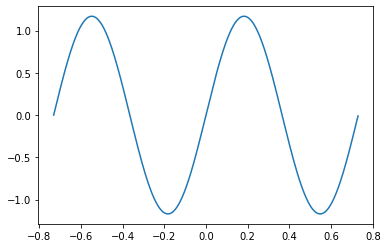

In [2]:
# params
f = 2 # also number of electrons
lam = 0.73 # also atomic radius
L = f*lam

x = np.arange(-0.5*L,0.5*L,0.001)

phi = np.sqrt(2/L)*np.sin(2*np.pi*f*x/L)
plt.plot(x,phi)
wf = 2/L*abs(phi)**2
wf_prob = sum(wf)
wf_prob

In [3]:
def mergedist(lamb, frequency, n):
  L = frequency*lamb
  datarange = np.arange(-0.5*L,0.5*L,0.001)
  d = norm.pdf(datarange, lamb/n, (lamb/np.pi)**2)/n
  df = pd.DataFrame(d, columns = np.arange(0,1))

  for i in range(0,n):
    d2 = norm.pdf(datarange, lamb*(2*i-n+1)/4, lamb/20)/n 
    # d2 = norm.pdf(datarange, (2*i-n+1)*lamb/n, lamb/(frequency*(n+1)))/n 
    df[i] = d2.tolist()

  return df, datarange

In [4]:
nnn,xdata = mergedist(lam, f, 2*f)
nnn['sum'] = nnn. sum(axis=1)
#plt.plot(x,nnn['sum'])

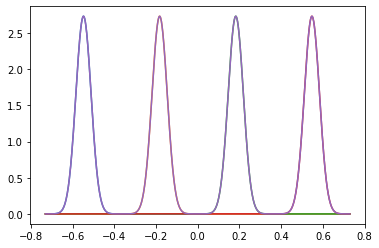

In [5]:
plt.plot(x,nnn)

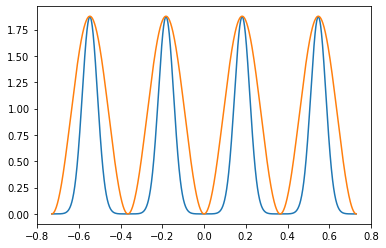

In [6]:
plt.plot(x,nnn['sum']/L)

plt.plot(x,wf)

## Electron configuration in atoms

In [7]:
def electrodist(f,r1):
  distdata = 2*f*np.sum(mergedist(r1, f, 2*f)[0],axis=1) # increased the probability value while reduced the range in order to get total probability for all orbitals
  xdata = mergedist(r1, f, 2*f)[1]
  return distdata, xdata

### H2O

(-1.0, 1.0)

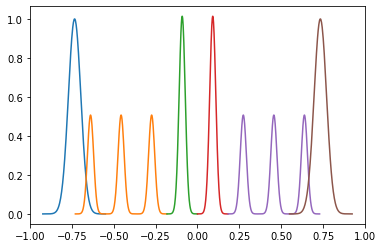

In [8]:
# Water (H2O)
h_atomic_radius = 0.37 # angstrom
o_atomic_radius = 0.73 # angstrom

# Hydrogen
f=1
dist1 = 2*f*np.sum(mergedist(h_atomic_radius, f, 2*f)[0],axis=1) # increased the probability value while reduced the range in order to get total probability for all orbitals
x1 = mergedist(h_atomic_radius, f, 2*f)[1]
x1 = (2*x1*h_atomic_radius/max(x1) - o_atomic_radius - 3*h_atomic_radius)/2

# Oxygen shell 1

f=2
dist2 = 2*f*np.sum(mergedist(o_atomic_radius, f, 2*f)[0],axis=1)
x2 = mergedist(o_atomic_radius, f, 2*f)[1]
x2 = (x2 - 0.5*o_atomic_radius)/2

# Oxygen shell 2
f=6
dist3 = 2*f*np.sum(mergedist(o_atomic_radius, f, 2*f)[0],axis=1)
x3 = mergedist(o_atomic_radius, f, 2*f)[1]
x3 = (x3 - o_atomic_radius)/2

# plots
plt.plot(x1[x1>=-2.5*h_atomic_radius] , dist1[x1>=-2.5*h_atomic_radius]/max(dist1))
plt.plot(-x3[x3>=o_atomic_radius/4], dist3[x3>=o_atomic_radius/4]/max(dist1))
plt.plot(-x2[x2>=0], 2*dist2[x2>=0]/max(dist1))
plt.plot(x2[x2>=0], 2*dist2[x2>=0]/max(dist1))
plt.plot(x3[x3>=o_atomic_radius/4], dist3[x3>=o_atomic_radius/4]/max(dist1))
plt.plot(-x1[x1>=-2.5*h_atomic_radius] , dist1[x1>=-2.5*h_atomic_radius]/max(dist1))

plt.xlim(-1,1)

(-1.0, 1.0)

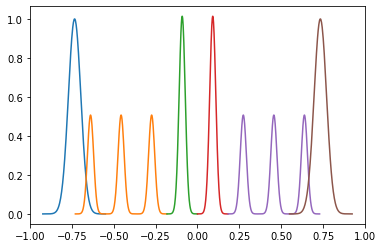

In [9]:
# Water (H2O)
h_atomic_radius = 0.37 # angstrom
o_atomic_radius = 0.73 # angstrom

# Hydrogen
dist1, x1 = electrodist(1,h_atomic_radius)
x1 = (2*x1*h_atomic_radius/max(x1) - o_atomic_radius - 3*h_atomic_radius)/2

# Oxygen shell 1
dist2, x2 = electrodist(2,o_atomic_radius)
x2 = (x2 - 0.5*o_atomic_radius)/2

# Oxygen shell 2
dist3, x3 = electrodist(6,o_atomic_radius)
x3 = (x3 - o_atomic_radius)/2

# plots
plt.plot(x1[x1>=-2.5*h_atomic_radius] , dist1[x1>=-2.5*h_atomic_radius]/max(dist1))
plt.plot(-x3[x3>=o_atomic_radius/4], dist3[x3>=o_atomic_radius/4]/max(dist1))
plt.plot(-x2[x2>=0], 2*dist2[x2>=0]/max(dist1))
plt.plot(x2[x2>=0], 2*dist2[x2>=0]/max(dist1))
plt.plot(x3[x3>=o_atomic_radius/4], dist3[x3>=o_atomic_radius/4]/max(dist1))
plt.plot(-x1[x1>=-2.5*h_atomic_radius] , dist1[x1>=-2.5*h_atomic_radius]/max(dist1))

plt.xlim(-1,1)

### Generalised

In [65]:
def electrodist(f,r1):
  distdata = 2*f*np.sum(mergedist(r1, f, 2*f)[0],axis=1) # increased the probability value while reduced the range in order to get total probability for all orbitals
  xdata = mergedist(r1, f, 2*f)[1]
  return distdata, xdata

### H2O

In [11]:
# Atom radii
atom1 = 0.37 # angstrom
atom2 = 0.73 # angstrom

(-1.5, 1.5)

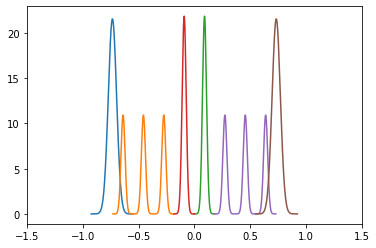

In [12]:
## Atom 1

# Shell 1
dist1_1, x1_1 = electrodist(1,atom1) #1:2
x1_1 = (2*x1_1*atom1/max(x1_1) - atom2 - 3*atom1)/2

# Shell 2
dist2_1, x2_1 = electrodist(3,atom2) #3
x2_1 = (2*x2_1*atom1/max(x2_1) - atom2 - 3*atom1)/2


## Atom 2 (central)

# Shell 1
dist1_2, x1_2 = electrodist(2,atom2) #2
x1_2 = (x1_2 - atom2)/2

# Shell 2
dist3_2, x3_2 = electrodist(6,atom2) #6
x3_2 = (x3_2 - atom2)/2

# plots

# Atom 1
#plt.plot(x2_1[x2_1>=-2.5*atom1] , dist2_1[x2_1>=-5/2*atom1])
plt.plot(x1_1[x1_1>=-2.5*atom1] , dist1_1[x1_1>=-5/2*atom1])

# Atom 2
plt.plot(-x3_2[x3_2>=atom2/4], dist3_2[x3_2>=atom2/4])
plt.plot(-x1_2[x1_2>=-atom2/4], 2*dist1_2[x1_2>=-atom2/4])
plt.plot(x1_2[x1_2>=-atom2/4], 2*dist1_2[x1_2>=-atom2/4])
plt.plot(x3_2[x3_2>=atom2/4], dist3_2[x3_2>=atom2/4])

# Atom 1
plt.plot(-x1_1[x1_1>=-2.5*atom1] , dist1_1[x1_1>=-5/2*atom1])
#plt.plot(-x2_1[x2_1>=-2.5*atom1] , dist2_1[x2_1>=-5/2*atom1])

plt.xlim(-1.5,1.5)

### CO2

In [13]:
# Atom radii
atom1 = 0.73 # angstrom
atom2 = 1.5 # angstrom

(-3.0, 3.0)

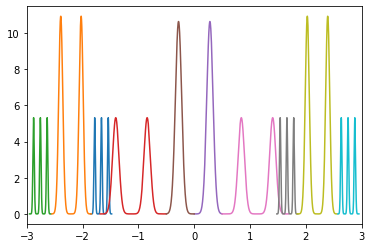

In [14]:
## Atom 1
s1_1 = 2
s2_1 = 6

# Shell 1
dist1_1, x1_1 = electrodist(s1_1,atom1) #1:2
x1_1 = (2*x1_1*atom1/max(x1_1) - atom2 - 3*atom1)/2

# Shell 2
dist2_1, x2_1 = electrodist(s2_1,atom2) #3
x2_1 = (2*x2_1*atom1/max(x2_1) - atom2 - 3*atom1)/2


## Atom 2 (central)
s1_2 = 2
s2_2 = 4

# Shell 1
dist1_2, x1_2 = electrodist(s1_2,atom2) #2
x1_2 = atom2*(x1_2 - atom2)/2

# Shell 2
dist3_2, x3_2 = electrodist(s2_2,atom2) #6
x3_2 = atom2*(x3_2 - ((2*s2_2-4)/8)*atom2)/2 # 4:0.5 6:1 8:1.5

# plots

# Atom 1
plt.plot(x2_1[x2_1-2/s2_1>=-5/2*atom1]-0.5*atom1 , dist2_1[x2_1-2/s2_1>=-5/2*atom1])
plt.plot(x1_1[x1_1>=-5/2*atom1]-atom1 , dist1_1[x1_1>=-5/2*atom1])
plt.plot(x2_1[x2_1-2/s2_1>=-5/2*atom1]-2*atom1 , dist2_1[x2_1-2/s2_1>=-5/2*atom1])

# Atom 2
plt.plot(-x3_2[x3_2>=atom2/3], dist3_2[x3_2>=atom2/3])
plt.plot(-x1_2[x1_2>=-atom2/3], 2*dist1_2[x1_2>=-atom2/3])
plt.plot(x1_2[x1_2>=-atom2/3], 2*dist1_2[x1_2>=-atom2/3])
plt.plot(x3_2[x3_2>=atom2/3], dist3_2[x3_2>=atom2/3])

# Atom 1
plt.plot(-x2_1[x2_1-2/s2_1>=-5/2*atom1]+0.5*atom1 , dist2_1[x2_1-2/s2_1>=-5/2*atom1])
plt.plot(-x1_1[x1_1>=-5/2*atom1]+atom1 , dist1_1[x1_1>=-5/2*atom1])
plt.plot(-x2_1[x2_1-2/s2_1>=-5/2*atom1]+2*atom1 , dist2_1[x2_1-2/s2_1>=-5/2*atom1])

plt.xlim(-3,3)

### Adaptable

In [15]:
# Atom radii
atom1 = 0.37 # angstrom
atom2 = 0.73 # angstrom

(-2.0, 2.0)

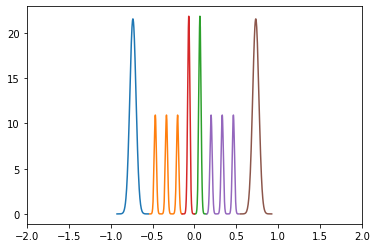

In [16]:
## Atom 1
s1_1 = 1
s2_1 = 0

# Shell 1
dist1_1, x1_1 = electrodist(s1_1,atom1) #1:2
x1_1 = (2*x1_1*atom1/max(x1_1) - atom2 - 3*atom1)/2

# Shell 2
if s2_1 > 0:
  dist2_1, x2_1 = electrodist(s2_1,atom2) #3
  x2_1 = (2*x2_1*atom1/max(x2_1) - atom2 - 3*atom1)/2


## Atom 2 (central)
s1_2 = 2
s2_2 = 6

# Shell 1
dist1_2, x1_2 = electrodist(s1_2,atom2) #2
x1_2 = atom2*(x1_2 - atom2)/2

# Shell 2
dist3_2, x3_2 = electrodist(s2_2,atom2) #6
x3_2 = atom2*(x3_2 - ((2*s2_2-4)/8)*atom2)/2 # 4:0.5 6:1 8:1.5

# plots

# Atom 1
if s2_1 > 0:
  plt.plot(x2_1[x2_1-2/s2_1>=-5/2*atom1]-0.5*atom1 , dist2_1[x2_1-2/s2_1>=-5/2*atom1])
  plt.plot(x1_1[x1_1>=-5/2*atom1]-atom1 , dist1_1[x1_1>=-5/2*atom1])
  plt.plot(x2_1[x2_1-2/s2_1>=-5/2*atom1]-2*atom1 , dist2_1[x2_1-2/s2_1>=-5/2*atom1])
if s2_1 == 0:
  plt.plot(x1_1[x1_1>=-5/2*atom1] , dist1_1[x1_1>=-5/2*atom1])

# Atom 2
plt.plot(-x3_2[x3_2>=atom2/5], dist3_2[x3_2>=atom2/5])
plt.plot(-x1_2[x1_2>=-atom2/5], 2*dist1_2[x1_2>=-atom2/5])
plt.plot(x1_2[x1_2>=-atom2/5], 2*dist1_2[x1_2>=-atom2/5])
plt.plot(x3_2[x3_2>=atom2/5], dist3_2[x3_2>=atom2/5])

# Atom 1
if s2_1 > 0:
  plt.plot(-x2_1[x2_1-2/s2_1>=-5/2*atom1]+0.5*atom1 , dist2_1[x2_1-2/s2_1>=-5/2*atom1])
  plt.plot(-x1_1[x1_1>=-5/2*atom1]+atom1 , dist1_1[x1_1>=-5/2*atom1])
  plt.plot(-x2_1[x2_1-2/s2_1>=-5/2*atom1]+2*atom1 , dist2_1[x2_1-2/s2_1>=-5/2*atom1])
if s2_1 == 0:
  plt.plot(-x1_1[x1_1>=-5/2*atom1] , dist1_1[x1_1>=-5/2*atom1])

plt.xlim(-2,2)

### Atomic surface

In [61]:
# Atom radii
atom1 = 0.37 # angstrom
atom2 = 0.73 # angstrom

In [62]:
## Atom 1
s1_1 = 1
s2_1 = 0

# Shell 1
dist1_1, x1_1 = electrodist(s1_1,atom1) #1:2
x1_1 = (2*x1_1*atom1/max(x1_1) - atom2 - 3*atom1)/2

# Shell 2
if s2_1 > 0:
  dist2_1, x2_1 = electrodist(s2_1,atom2) #3
  x2_1 = (2*x2_1*atom1/max(x2_1) - atom2 - 3*atom1)/2


## Atom 2 (central)
s1_2 = 2
s2_2 = 6

# Shell 1
dist1_2, x1_2 = electrodist(s1_2,atom2) #2
x1_2 = atom2*(x1_2 - atom2)/2

# Shell 2
dist3_2, x3_2 = electrodist(s2_2,atom2) #6
x3_2 = atom2*(x3_2 - ((2*s2_2-4)/8)*atom2)/2 # 4:0.5 6:1 8:1.5

In [63]:
def molecule(translate):
  # Atom 1
  if s2_1 > 0:
    plt.plot(x2_1[x2_1-2/s2_1>=-5/2*atom1]-0.5*atom1+translate , dist2_1[x2_1-2/s2_1>=-5/2*atom1])
    plt.plot(x1_1[x1_1>=-5/2*atom1]-atom1+translate , dist1_1[x1_1>=-5/2*atom1])
    plt.plot(x2_1[x2_1-2/s2_1>=-5/2*atom1]-2*atom1+translate , dist2_1[x2_1-2/s2_1>=-5/2*atom1])
  if s2_1 == 0:
    plt.plot(x1_1[x1_1>=-5/2*atom1]+translate , dist1_1[x1_1>=-5/2*atom1])

  # Atom 2
  plt.plot(-x3_2[x3_2>=atom2/5]+translate, dist3_2[x3_2>=atom2/5])
  plt.plot(-x1_2[x1_2>=-atom2/5]+translate, 2*dist1_2[x1_2>=-atom2/5])
  plt.plot(x1_2[x1_2>=-atom2/(s2_2-1)]+translate, 2*dist1_2[x1_2>=-atom2/(s2_2-1)])
  plt.plot(x3_2[x3_2>=atom2/(s2_2-1)]+translate, dist3_2[x3_2>=atom2/(s2_2-1)])

  # Atom 1
  if s2_1 > 0:
    plt.plot(-x2_1[x2_1-2/s2_1>=-5/2*atom1]+0.5*atom1+translate , dist2_1[x2_1-2/s2_1>=-5/2*atom1])
    plt.plot(-x1_1[x1_1>=-5/2*atom1]+atom1+translate , dist1_1[x1_1>=-5/2*atom1])
    plt.plot(-x2_1[x2_1-2/s2_1>=-5/2*atom1]+2*atom1+translate , dist2_1[x2_1-2/s2_1>=-5/2*atom1])
  if s2_1 == 0:
    plt.plot(-x1_1[x1_1>=-5/2*atom1]+translate , dist1_1[x1_1>=-5/2*atom1])


(-5.0, 5.0)

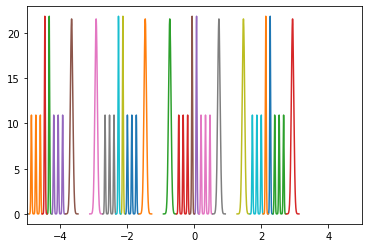

In [64]:
# plots

## Molecules

tr = 2*(atom1 + atom2)
rng = 5

#tr = 40
#rng = 120
#rng = 10**4 # micrometre 
# metre of surface is 10**10

for i in range(-round(rng/tr),round(rng/tr)):
  molecule(i*tr)

plt.xlim(-rng,rng)

# Quantum Relativity

## Categorising planets

In [168]:
def orbital_free_ratio(gravity):
  return gravity*(9.1E-31)*(6.63E-34)/(1.6E-19)**2

def total_electrons(mass):
  return 0.49*mass/(1.672619*10**-27) # total number of electrons

In [169]:
# Planetary data

planet = np.array(['Merc 3.7', 'Venus 8.8', 'Earth 9.8', 'Mars 3.7', 'Jupiter 24.7', 'Saturn 10.5', 'Uranus 9.0','Neptune 11.7','Pluto 0.49', 'Sun 293.0'])

Volume = np.array([6.08*10**19,9.2843*10**20,1.0832*10**21,1.6318*10**20,1.43128*10**24,8.2713*10**23,6.833*10**22,6.254E22,6.4E18,1.4*10**27])
Pressure = np.array([101325,93*101325,101325,610,400000,140000,101325,1000E5,0.022,340000000000*101325])  # pascals
Temp = np.array([415,737,288,210,165,134,76,72,44,5778])  # kelvin
Core_Pressure = np.array([5,700,330,40,3000,4620,800,10,1.34,2.6E7])  # gigapascals (Venus unknown)
Sun_distance = np.array([0.39,0.72,1,1.52,5.2,9.54,19.2,30.06,39,0.001]) # au

relperm = np.array([5000,8000,8000,8000,1,1,1,8000,1,1])  # air = 1, pure iron - 8000
B = np.array([0,0,38,0.1,550,400,32,27,0,76])*10**-6  # sufarce B_r
t = np.array([1408,5832,24,25,10,11,17,16,6.4*24,34*24])*60*60  # seconds in planet day

Tcore = np.array([8000,5160,5000,1500,20000,35000,5000,7273,1000,15E6])  # kelvin

Grav = np.array([3.7,8.8,9.8,3.7,24.7,10.5,9.0,11.7,0.49,293.0])  # m2s_2
mass = np.array([0.330,4.87,5.97,0.642,1898,568,86.8,1.024E2,0.01303,1989000])*10**24  # kg

## Include Moons ##

moon = np.array(['Moon 1.6', 'Titan (Saturn) 1.4', 'Ganymede'])

VolumeM = np.array([2.1968E19,7.16E19])
PressureM = np.array([3E-10, 147E3])  # pascals
TempM = np.array([26, 94])  # kelvin
Core_PressureM = np.array([5,1.3])  # gigapascals (Venus unknown)
Sun_distanceM = np.array([1,9.5]) # au

relpermM = np.array([5000,1])  # air = 1, pure iron - 8000
BM = np.array([38/1000,0])*10**-6  # sufarce B_r
tM = np.array([708.72,15.9*24])*60*60  # seconds in planet day

TcoreM = np.array([1650,93.6])  # kelvin

GravM = np.array([1.62,1.352])  # m2s_2
massM = np.array([0.07347,0.13452])*10**24  # kg

# Attach Planets and Moons
planet = np.concatenate((planet, moon))

Volume = np.concatenate((Volume, VolumeM))
Pressure = np.concatenate((Pressure, PressureM))  # pascals
Temp = np.concatenate((Temp, TempM))  # kelvin
Core_Pressure = np.concatenate((Core_Pressure, Core_PressureM))  # gigapascals (Venus unknown)
Sun_distance = np.concatenate((Sun_distance, Sun_distanceM)) # au

relperm = np.concatenate((relperm, relpermM))  # air = 1, pure iron - 8000
B = np.concatenate((B, BM))  # sufarce B_r
t = np.concatenate((t, tM))  # seconds in planet day

Tcore = np.concatenate((Tcore, TcoreM))  # kelvin

Grav = np.concatenate((Grav, GravM))  # m2s_2
mass = np.concatenate((mass, massM)) # kg

orb2free_ratio = orbital_free_ratio(Grav) # = (e_orb + e_free) / e_orb  (or = eT / e_orb)
eT = total_electrons(mass)

# Note that orb2free_ratio = eT / e_orb
# and so e_orb = eT / orb2free_ratio

e_orb = eT * orb2free_ratio

e_free = eT - e_orb


##############################################################
#### Free electrons causing magnetic and thermal activity ####
##############################################################

q = 1.6E-19
me = 9.1E-31
c = 0.8 # specific heat capacity of liquid iron

# Working out magnetic field strength

uo = 4*np.pi*10**-7
u = relperm*uo

current = q/t

# B = u*n_free**(1/2)*current # 1/2 to reduce free electron volume to a free electron surface like a coil of wire (might not need this)

# n_free makes up whole sphere of Iron core, but only surface is calculated. To go from surace to volume divide by 3 increase power by 1.
# assume n_free volume = 4/3 pi r^3 then n_free Area = 4 pi r^2

n_freeMG = (B/(u*current))**(2) 

Eth = (e_free-n_freeMG)*me*c*(Tcore-Temp)
n_freeTH = Eth/(me*c*(Tcore-Temp))

n_free = n_freeMG + n_freeTH

print('Total electrons')
print(eT)
print('Total orbital electrons')
print(e_orb)
print('Total free electrons - gravity prediction')
print(e_free)
print('Total free electrons - magnetic & thermal prediction')
print(n_free)
print('Free electrons causing magnetic field')
print(n_freeMG)
print('Free electrons causing thermal currents')
print(n_freeTH)

# Merc, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune, Pluto, Sun + Moon, Titan

Total electrons
[9.667473584839104e+49 1.4266847381262556e+51 1.7489338576208923e+51
 1.880763042868699e+50 5.56026208000746e+53 1.6639772715723064e+53
 2.5428385065576794e+52 2.9998463487500743e+52 3.817187297286471e+48
 5.826849987953024e+56 2.1523311644791788e+49 3.9408137776744135e+49]
Total orbital electrons
[8.43004074233657e+24 2.9588683542471413e+26 4.039377261843925e+26
 1.6400261080545692e+25 3.236735200861455e+29 4.11767100633049e+28
 5.39356906463008e+27 8.271796242898115e+27 4.4081311324812685e+22
 4.023614949792529e+33 8.217487724897115e+23 1.2556759025807732e+24]
Total free electrons - gravity prediction
[9.667473584839104e+49 1.4266847381262556e+51 1.7489338576208923e+51
 1.880763042868699e+50 5.56026208000746e+53 1.6639772715723064e+53
 2.5428385065576794e+52 2.9998463487500743e+52 3.817187297286471e+48
 5.826849987953024e+56 2.1523311644791788e+49 3.9408137776744135e+49]
Total free electrons - magnetic & thermal prediction
[9.667473584839104e+49 1.4266847381262554e+51

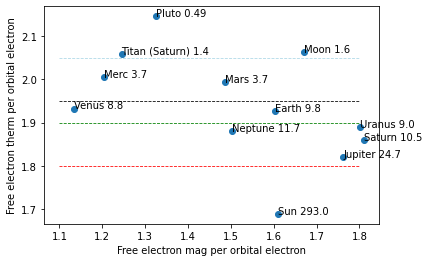

In [170]:
n = 12

z = np.log(e_orb[0:n].astype('float64'))

y = (n_freeMG[0:n])
y[y==0]=1E30
y = np.log(y.astype('float64'))

y2 = ((n_freeTH[0:n]))
y2 = np.log(y2.astype('float64'))

# Plots
plt.scatter(y/z,y2/z);

for i, txt in enumerate(planet[0:n]):
    plt.annotate(txt, (y[i]/z[i], y2[i]/z[i]))

plt.xlabel('Free electron mag per orbital electron')
plt.ylabel('Free electron therm per orbital electron')

# Atmosphere zone (blue dash)
plt.plot(np.linspace(1.1,1.8,10),2.05*np.ones(10),'--', color = 'lightblue', linewidth = 0.8)
plt.plot(np.linspace(1.1,1.8,10),1.95*np.ones(10),'--', color = 'k', linewidth = 0.8)
plt.plot(np.linspace(1.1,1.8,10),1.9*np.ones(10),'--', color = 'g', linewidth = 0.8)
plt.plot(np.linspace(1.1,1.8,10),1.8*np.ones(10),'--', color = 'r', linewidth = 0.8)

## Testing gravity equation

In [60]:
# Finding out the constant
ag = [3.7,8.8,9.8,3.7,24.7,10.5,9.0,11.7,0.49,293,1.6,1.4]

k = ag*(n_free[0:n])/(e_orb[0:n].astype('float64'))
k = np.mean(k)
k

4.251305619878133e+25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0, 0.5, 'Acceleration due to gravity')

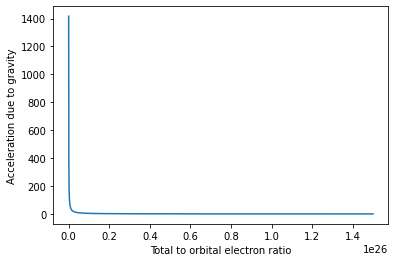

In [53]:
x = np.linspace(0,1.5E26,5000)
ag = k/x
plt.plot(x,ag);

plt.xlabel('Total to orbital electron ratio')
plt.ylabel('Acceleration due to gravity')

4.251305619878133e+25

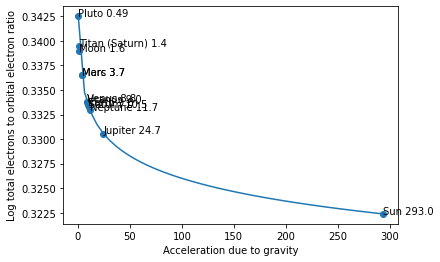

In [54]:
n = 12

ratio = (n_free[0:n])/(e_orb[0:n].astype('float64'))

ag = [3.7,8.8,9.8,3.7,24.7,10.5,9.0,11.7,0.49,293,1.6,1.4][0:n]

plt.scatter(ag,np.log(np.log(np.log(np.log(ratio.astype(float))))));

x = np.linspace(min(ag),max(ag))  # 2E9 for neutron star
k = ag*ratio
k = np.mean(k)
y = k/x

plt.plot(x,np.log(np.log(np.log(np.log(y)))));

for i, txt in enumerate(planet[0:n]):
    plt.annotate(txt, (ag[i], np.log(np.log(np.log(np.log((n_free[i])/(e_orb[i])))))))

plt.ylabel('Log total electrons to orbital electron ratio')
plt.xlabel('Acceleration due to gravity')

k

4.251305619878133e+25

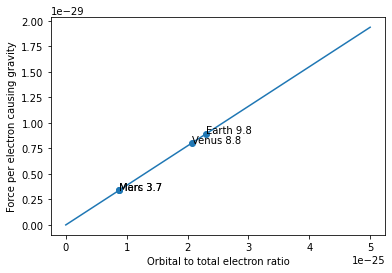

In [55]:
n = 4

z = (e_orb[0:n].astype('float64'))

y = (n_freeMG[0:n])
y[y==0]=1E30
y = (y.astype('float64'))

y2 = ((n_free[0:n]))
y2 = (y2.astype('float64'))

plt.scatter(z/y2,9.10938356E-31*k*(z/y2))

for i, txt in enumerate(planet[0:n]):
    plt.annotate(txt, (z[i]/y2[i], 9.10938356E-31*k*(z[i]/y2[i])))

x = np.linspace(0,np.sqrt(1/n)*1E-24,5000)
F = 9.10938356E-31*k*x

plt.plot(x,F);

plt.xlabel('Orbital to total electron ratio')
plt.ylabel('Force per electron causing gravity')

k

# Wave mathematics

## 2D

(-100.0, 100.0)

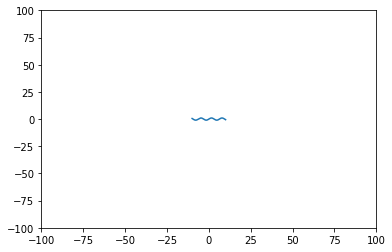

In [66]:
A = 1
f = 1
xL = 10

x = np.linspace(-xL,xL,1000)
y = A*np.sin(f*x)
plt.plot(x,y)

plt.xlim(-100,100)
plt.ylim(-100,100)

(-100.0, 100.0)

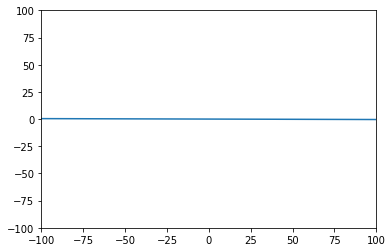

In [68]:
A = 1
f = 1
xL = 100000

x = np.linspace(-xL,xL,1000)
y = A*np.sin(f*x)
plt.plot(x,y)

plt.xlim(-100,100)
plt.ylim(-100,100)

(-100.0, 100.0)

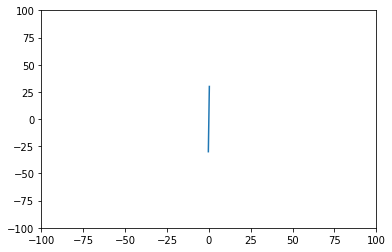

In [69]:
A = 10000
f = 0.01
xL = 0.3

x = np.linspace(-xL,xL,1000)
y = A*np.sin(f*x)
plt.plot(x,y)

plt.xlim(-100,100)
plt.ylim(-100,100)

(-100.0, 100.0)

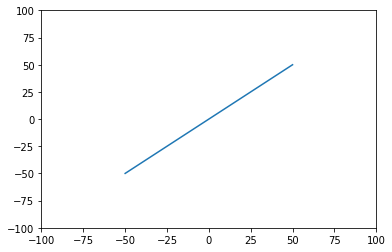

In [70]:
A = 1000
f = 0.001
xL = 50

x = np.linspace(-xL,xL,1000)
y = A*np.sin(f*x)
plt.plot(x,y)

plt.xlim(-100,100)
plt.ylim(-100,100)

(-100.0, 100.0)

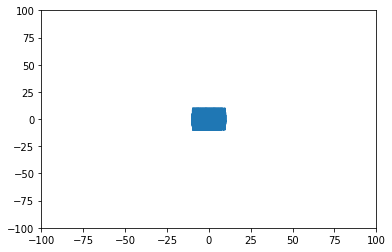

In [71]:
A = 10
f = 100000000
xL = 10

x = np.linspace(-xL,xL,1000)
y = A*np.sin(f*x)
plt.plot(x,y)

plt.xlim(-100,100)
plt.ylim(-100,100)

(-100.0, 100.0)

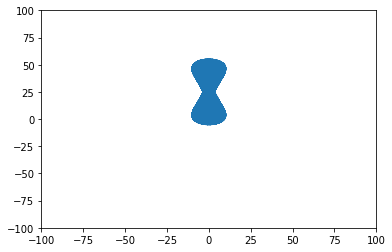

In [72]:
A = 10
f = 100000000
xL = 10

u = np.linspace(-xL,xL,1000)-25

x = 10*np.sin(f*u)
y = 30*np.sin(0.5*f*u)+25
plt.plot(x,y)

plt.xlim(-100,100)
plt.ylim(-100,100)

(-100.0, 100.0)

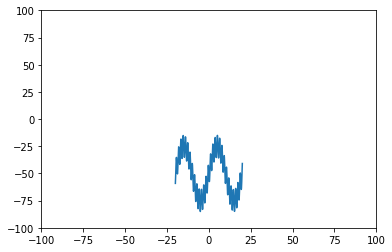

In [74]:
A = 10
f = 100000000
xL = 20

x = np.linspace(-xL,xL,1000)
y = A*np.sin(f*x)+25*np.sin(np.pi*f*x)-50
plt.plot(x,y)

plt.xlim(-100,100)
plt.ylim(-100,100)

## 3D

### Wall

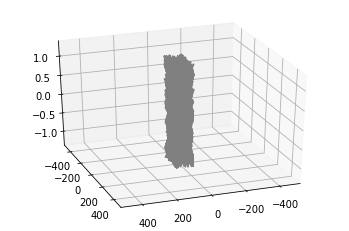

In [88]:
A = 10
f = 1000000000
xL = 10

x = np.linspace(-xL,xL,1000)

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = 2/15*A*np.sin(100*f*x)
xline = 5*A*np.sin(0.1*f*x)
yline = 10*A*np.sin(f*(100*A*np.sin(f*x)))
ax.plot3D(xline, yline, zline, 'gray')

plt.xlim(-500,500)
plt.ylim(-500,500)


ax.view_init(30, 70)


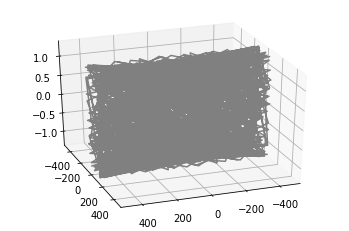

In [89]:
A = 10
f = 100
xL = 10

x = np.linspace(-xL,xL,1000)

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = 2/15*A*np.sin(100*f*x)
xline = 50*A*np.sin(20*f*(100*A*np.sin(0.02*f*x)))
yline = 10*A*np.sin(0.02*f*(100*A*np.sin(0.02*f*x)))
ax.plot3D(xline, yline, zline, 'gray')


#x = 10*np.sin(f*u)
#y = 30*np.sin(0.5*f*u)+25

plt.xlim(-500,500)
plt.ylim(-500,500)


ax.view_init(30, 70)

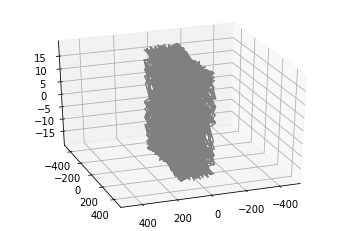

In [90]:
A = 10
f = 100
xL = 10

x = np.linspace(-xL,xL,1000)

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = 2*A*np.sin(100*f*x)
xline = 10*A*np.sin(20*f*(100*A*np.sin(0.02*f*x)))
yline = 30*A*np.sin(0.02*f*(100*A*np.sin(0.02*f*x)))
ax.plot3D(xline, yline, zline, 'gray')


#x = 10*np.sin(f*u)
#y = 30*np.sin(0.5*f*u)+25

plt.xlim(-500,500)
plt.ylim(-500,500)


ax.view_init(30, 70)

### Smoother wall

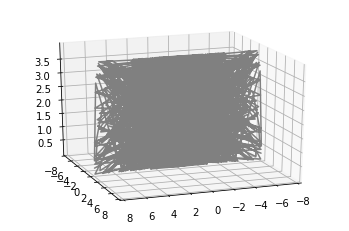

In [83]:
# 8x7x2 
Ax = 4
Ay = 0.01
Az = 4

f = 100000
xL = 1

x = np.linspace(-xL,xL,1000)
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = Ax*np.sin(f*np.sin(f*x))*np.cos(f*np.cos(f*x))+Ax*np.sin(f*np.sin(f*x))*np.cos(f*np.cos(f*x))
yline = Ay*np.cos(f*Ay*np.cos(f*x))+Ay*np.cos(f*Ay*np.cos(f*x))
zline = Az*np.sin(f*Az*np.sin(f*x))*np.sin(f*Az*np.sin(f*x))
ax.plot3D(xline, yline, zline, 'gray')

plt.xlim(-2*(Ax+Ay),2*(Ax+Ay))
plt.ylim(-2*(Ax+Ay),2*(Ax+Ay))


ax.view_init(20, 70)

### Cuboid

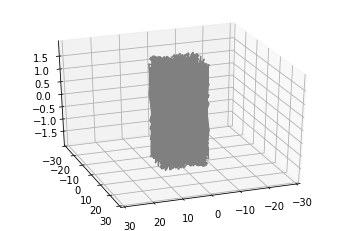

In [79]:
# 8x7x2 cube
Ax = 8
Ay = 7
Az = 2

f = 10
xL = 10

x = np.linspace(-xL,xL,1000)

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = Az*np.sin(100*f*x)
xline = Ax*np.sin(20*f*(100*A*np.sin(0.02*f*x)))
yline = Ay*np.sin(0.02*f*(100*A*np.sin(0.02*f*x)))
ax.plot3D(xline, yline, zline, 'gray')

plt.xlim(-2*(Ax+Ay),2*(Ax+Ay))
plt.ylim(-2*(Ax+Ay),2*(Ax+Ay))


ax.view_init(30, 70)

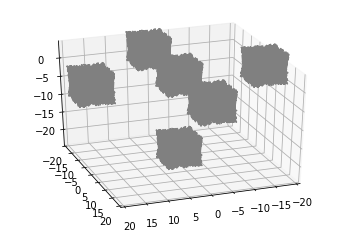

In [80]:
A = 10

Ax = 1
Ay = 1
Az = 1

f = 1000000000
xL = 10

s = 2 # size of cubes
n = 4 # number of cubes

x = np.linspace(-xL,xL,1000)

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = Ax*np.sin(20*f*(100*A*np.sin(0.02*f*x)))*n
yline = Ay*np.sin(0.02*f*(100*A*np.sin(0.02*f*x)))*n
zline = Az*np.sin(100*f*x)*n
ax.plot3D(xline, yline, zline, 'gray')

# Data for a three-dimensional line
xline = Ax*np.sin(20*f*(100*A*np.sin(0.02*f*x)))*n
yline = Ay*np.sin(0.02*f*(100*A*np.sin(0.02*f*x)))*n
zline = Az*np.sin(100*f*x)*n-20
ax.plot3D(xline, yline, zline, 'gray')

# Data for a three-dimensional line
xline = Ax*np.sin(20*f*(100*A*np.sin(0.02*f*x)))*n-20
yline = Ay*np.sin(0.02*f*(100*A*np.sin(0.02*f*x)))*n
zline = Az*np.sin(100*f*x)*n
ax.plot3D(xline, yline, zline, 'gray')

# Data for a three-dimensional line
xline = Ax*np.sin(20*f*(100*A*np.sin(0.02*f*x)))*n 
yline = Ay*np.sin(0.02*f*(100*A*np.sin(0.02*f*x)))*n -20
zline = Az*np.sin(100*f*x)*n
ax.plot3D(xline, yline, zline, 'gray')

# Data for a three-dimensional line
xline = Ax*np.sin(20*f*(100*A*np.sin(0.02*f*x)))*n +20
yline = Ay*np.sin(0.02*f*(100*A*np.sin(0.02*f*x)))*n
zline = Az*np.sin(100*f*x)*n
ax.plot3D(xline, yline, zline, 'gray')

# Data for a three-dimensional line
xline = Ax*np.sin(20*f*(100*A*np.sin(0.02*f*x)))*n 
yline = Ay*np.sin(0.02*f*(100*A*np.sin(0.02*f*x)))*n +20
zline = Az*np.sin(100*f*x)*n
ax.plot3D(xline, yline, zline, 'gray')


plt.xlim(-10*(Ax+Ay),10*(Ax+Ay))
plt.ylim(-10*(Ax+Ay),10*(Ax+Ay))


ax.view_init(30, 70)

### Mobius strip

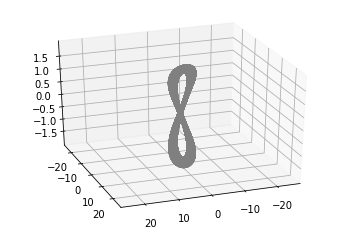

In [82]:
# 8x7x2 cube
Ax = 8
Ay = 5
Az = 2

f = 10000
xL = 1

x = np.linspace(-xL,xL,1000)
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = Ax*np.cos(f*x)*np.sin(f*x)
yline = Ay*np.sin(f*x)*np.sin(f*x)
zline = Az*np.sin(f*x)
ax.plot3D(xline, yline, zline, 'gray')

plt.xlim(-2*(Ax+Ay),2*(Ax+Ay))
plt.ylim(-2*(Ax+Ay),2*(Ax+Ay))


ax.view_init(30, 70)

## Using wave mathematics to model a planet

In [ ]:
def model_cube(X,Y,Z, ef,space, position):
  xline = X*np.sin(20*ef*(1000*np.sin(0.02*ef*space)))*n + position[0]
  yline = Y*np.sin((0.5)*ef*(1000*np.sin(0.02*ef*space)))*n + position[1]
  zline = Z*np.sin(0.01*ef*space)*n + position[2]
  ax.plot3D(xline, yline, zline, 'gray')

def model_planet(X,Y,Z,type,space,position):
  orbital_cube = model_cube(X,Y,Z,e_orb[type],space,position)
  thermal_cube = model_cube(X,Y,Z,n_freeTH[type],space,position)
  magnetic_cube = model_cube(X,Y,Z,n_freeMG[type],space,position)
  return orbital_cube,thermal_cube, magnetic_cube

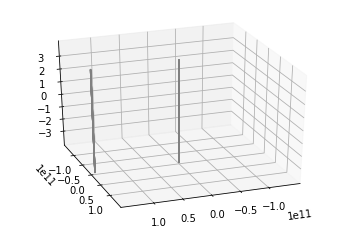

In [ ]:
s = 1 # Amp of waves (eV of electron waves)

Ax = 1*s
Ay = 1*s
Az = 1*s

f = 1000000000
xL = 10
n = 4 # size of cubes

x = np.linspace(-xL,xL,1000)
ax = plt.axes(projection='3d')

# Sun
sun = 9

# Earth
d = 1.496E11  # 1AU
earth = 2

orbital1, thermal1, magnetic1 = model_planet(Ax,Ay,Az,sun,x,[0,0,0])
orbital2, thermal2, magnetic2 = model_planet(Ax,Ay,Az,earth,x,[d,0,0])

plt.xlim(-10*(Ax+Ay)-d,10*(Ax+Ay)+d)
plt.ylim(-10*(Ax+Ay)-d,10*(Ax+Ay)+d)
ax.view_init(30, 70)

In [ ]:
# Gravitational Force between the planets

# This theory suggests that it's only based on orbital electrons and electrostatic force (perhaps convolution of electrostatic force)

e_orb[sun]
e_orb[earth]

# Electrostatic forces within planet F = kq1q2/r**2
k = 8.98755E9
FE = k*(1.6E-19*e_orb[earth])/((6371E3)**2)
FS =k*(1.6E-19*e_orb[sun])/((696340E3)**2)
FE+FS
#exp 3.557E22

11946909.2128296

# Ring mathematics

## 2D

### Orbital

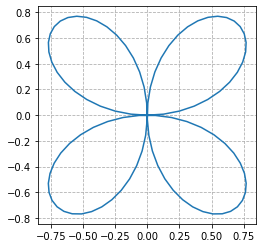

In [94]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 100)

r = np.sin(2*theta)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1)

ax.plot(x1, x2)
ax.set_aspect(1)


plt.grid(linestyle='--')

### Force orbitals

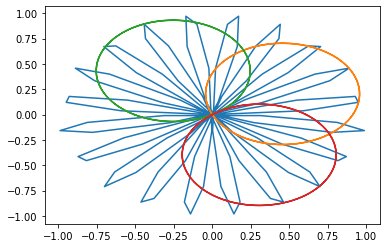

In [95]:
theta = np.linspace(0, 2*np.pi, 100)

r = np.sin(10*theta)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

plt.plot(x1, x2)


r = np.sin(theta+20)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

plt.plot(x1, x2)


r = np.sin(theta+100)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

plt.plot(x1, x2)


r = np.sin(theta+147)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

plt.plot(x1, x2)

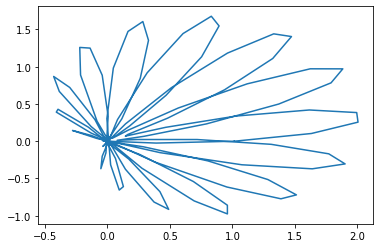

In [96]:
theta = np.linspace(0, 2*np.pi, 100)

r = np.sin(10*theta)+np.sin(theta+20)+np.sin(theta+100)+np.sin(theta+147)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

plt.plot(x1, x2)

### Discrete polar

14


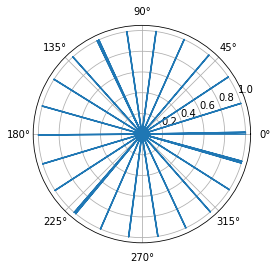

In [97]:
print(sum([1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]))
plt.polar([1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]);

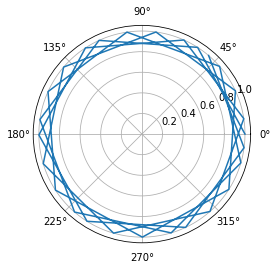

In [98]:
plt.polar([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]);

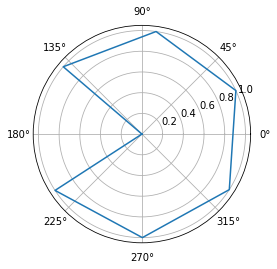

In [99]:
plt.polar([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]);

## 3D

In [100]:
# setup enviornment for interactive plotting
!apt-get install -qq xvfb
!pip install pyvista panel -q

import os
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

import panel as pn
pn.extension('vtk')

# ### new cell spline example cell ###
# pn.extension('vtk')  # this needs to be at the top of each cell for some reason

# n_points = 100
# theta = np.linspace(-4 * np.pi, 4 * np.pi, n_points)
# z = np.linspace(-2, 2, n_points)
# r = z ** 2 + 1
# x = r * np.sin(theta)
# y = r * np.cos(theta)
# points = np.column_stack((x, y, z))

# # Create spline with 1000 interpolation points
# spline = pv.Spline(points, 1000)

# # add scalars to spline and plot it
# spline["scalars"] = np.arange(spline.n_points)
# tube = spline.tube(radius=0.1)
# tube.plot(smooth_shading=True, notebook=True)

### Proof sine in polar converges to circle

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


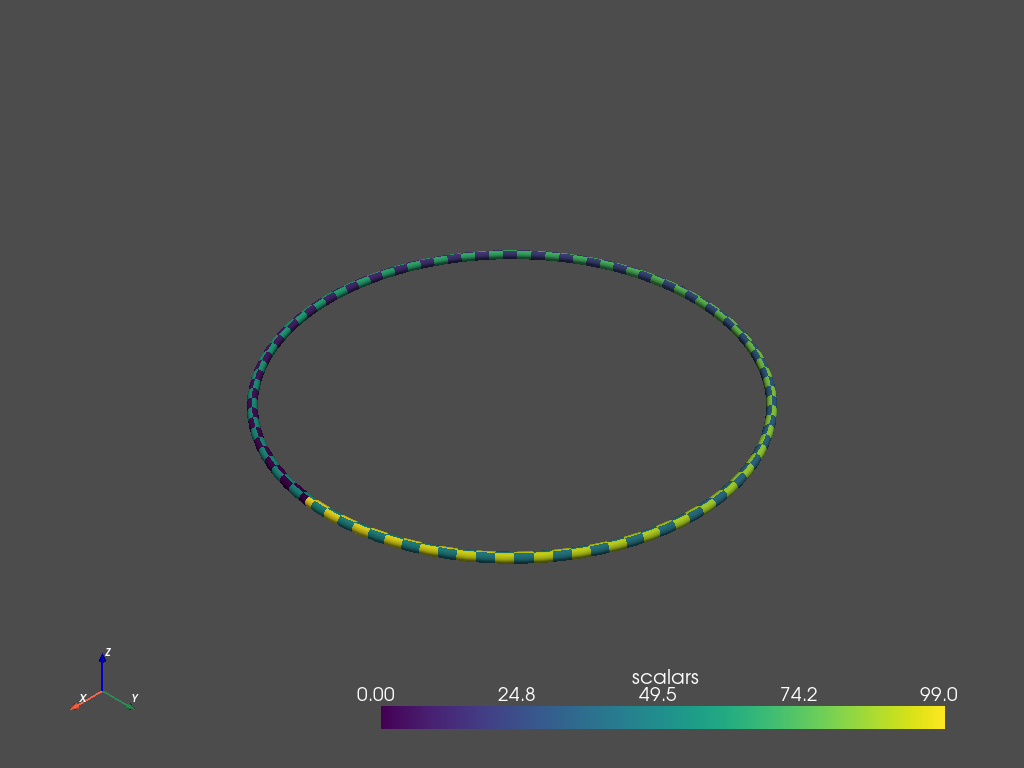

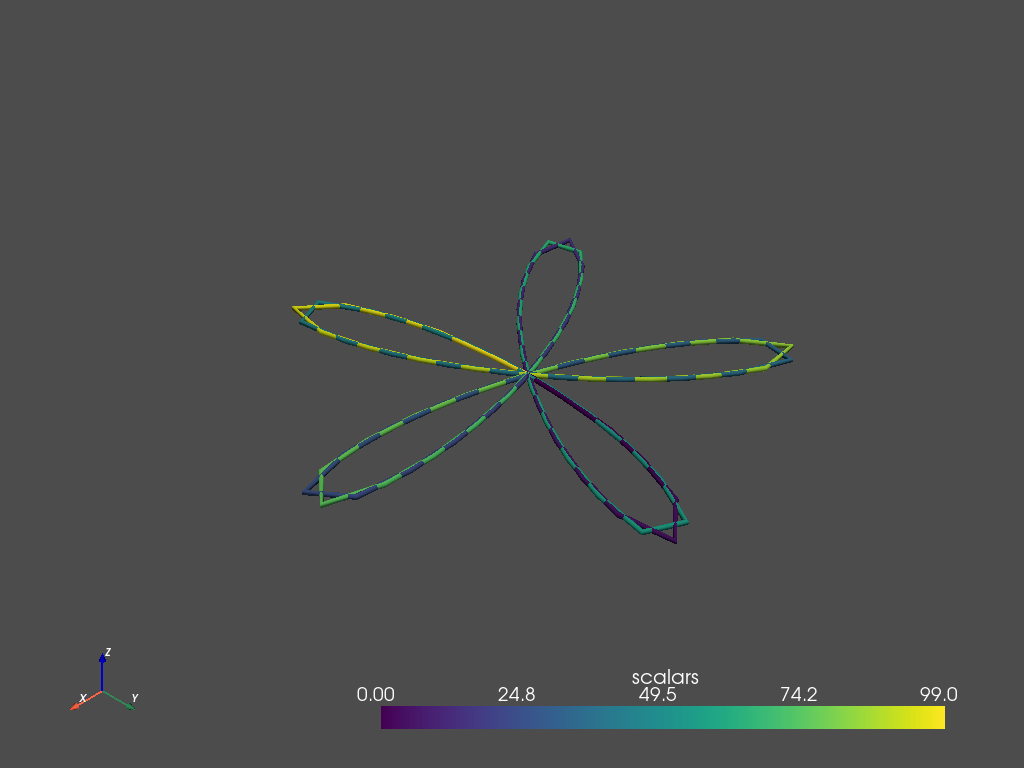

In [101]:
# setup enviornment for interactive plotting

import os
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

import panel as pn
pn.extension('vtk')

### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = np.sin(100*theta)+np.sin(100*theta)
x = r * np.sin(theta)
y = r * np.cos(theta)
points = np.column_stack((x, y, z))

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 100)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=0.02)
tube.plot(smooth_shading=True, notebook=True)


### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = np.sin(5*theta)+np.sin(5*theta)
x = r * np.sin(theta)
y = r * np.cos(theta)
points = np.column_stack((x, y, z))

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 100)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=0.02)
tube.plot(smooth_shading=True, notebook=True)

### Two perpendicular force rings

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


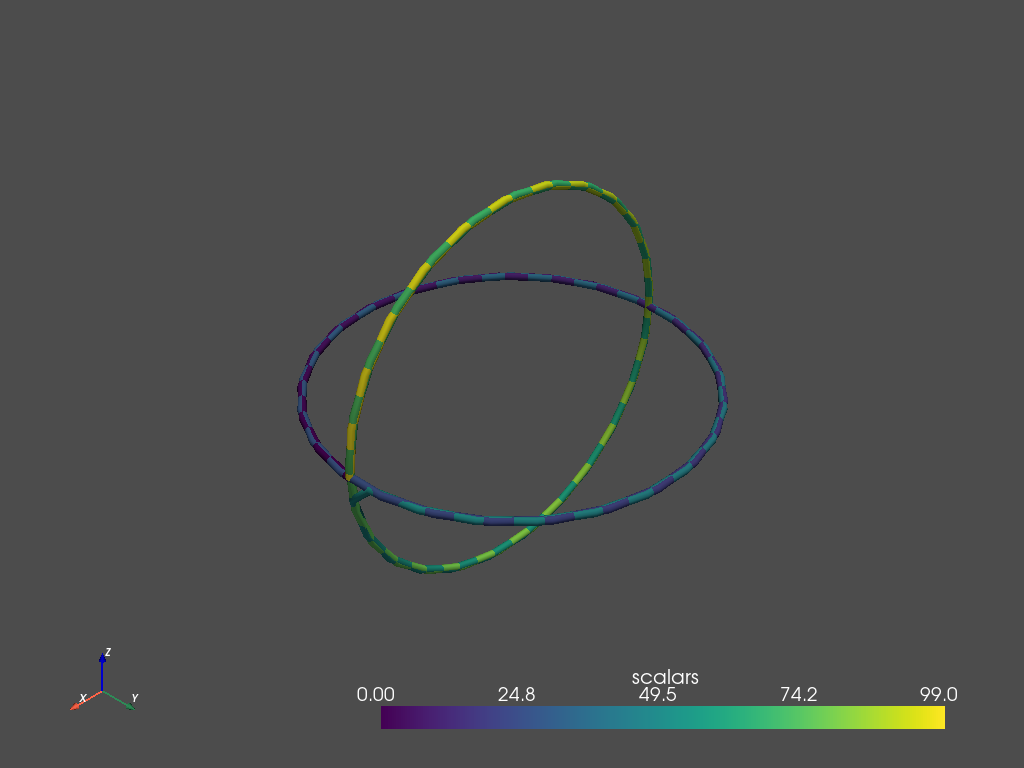

In [102]:
# setup enviornment for interactive plotting

import os
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

import panel as pn
pn.extension('vtk')

### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

f = 100

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
x = r * np.sin(theta)
y = r * np.cos(theta)
points = np.column_stack((x, y, z))



theta = np.linspace(-np.pi, np.pi, n_points)
z = y 
r = r
x = x
y = np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 100)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=0.02)
tube.plot(smooth_shading=True, notebook=True);


# 3D modelling with ring mathematics

In [104]:
# setup enviornment for interactive plotting

import os
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

import panel as pn
pn.extension('vtk')

## Sphere

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


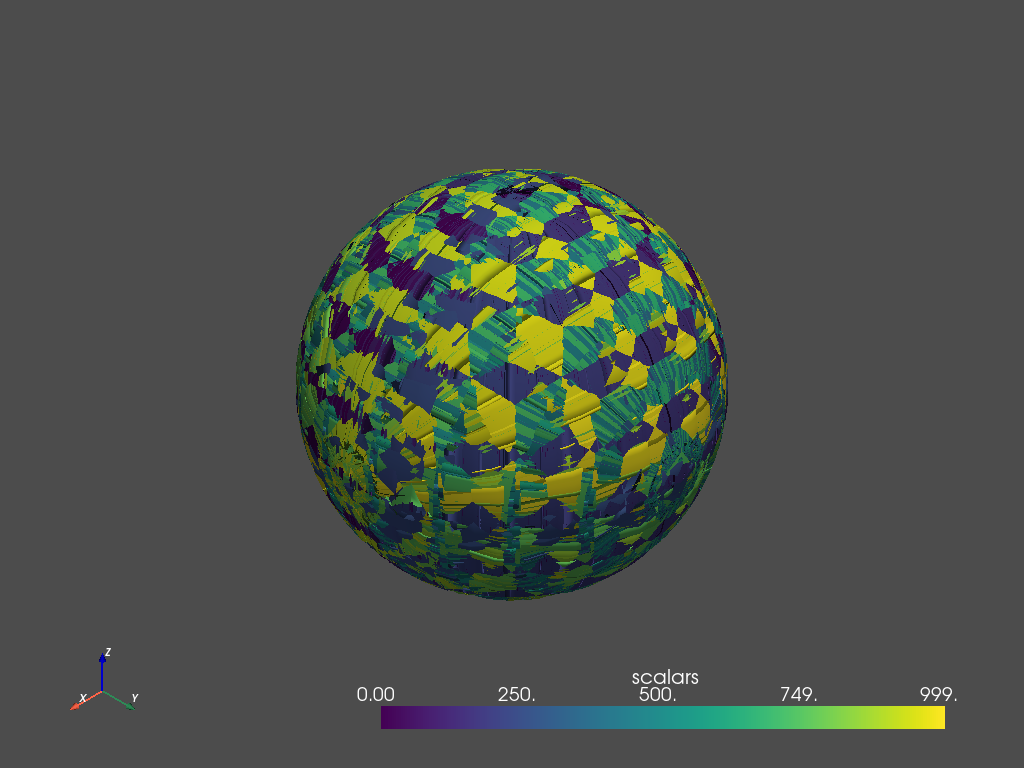

In [123]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 1
f = 99

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))






# Create spline with 1000 interpolation points
spline = pv.Spline(points, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


## Two relative models

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


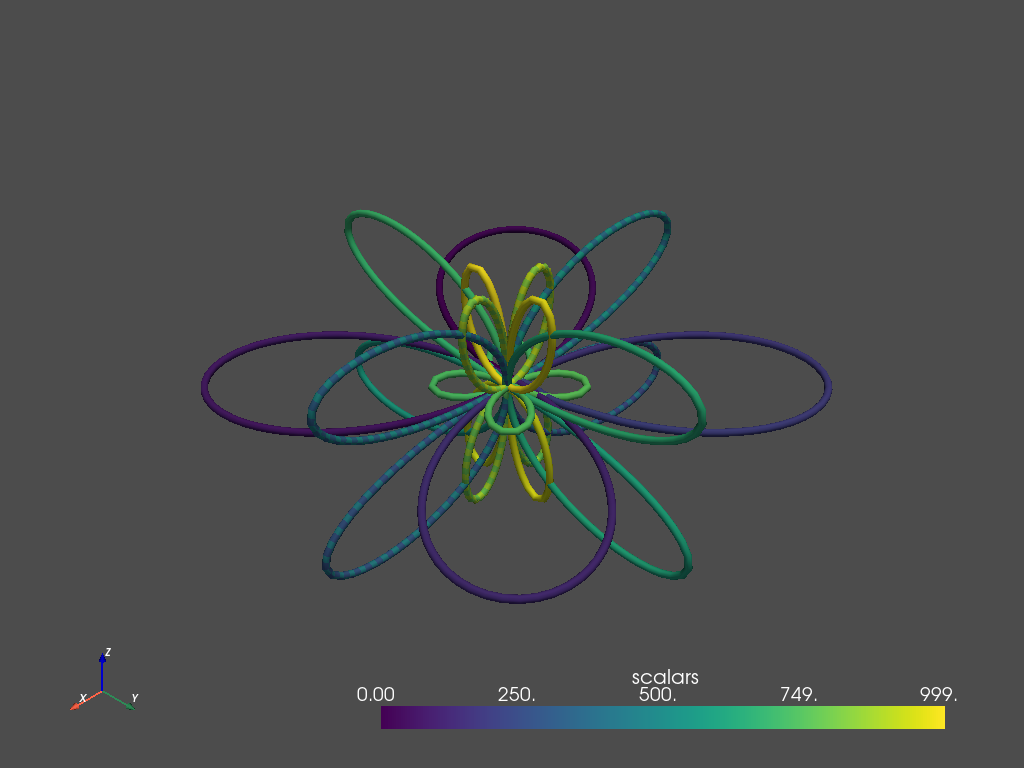

In [124]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 2
f = 2

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# object 2

A = 1/2
f = 2

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.concatenate((points,np.column_stack((x, y, z))))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


## Object

In [125]:
def objct(points,A,f,n_points,X,Y,Z):

  T = 1/f
  # Horizontal ring


  theta = np.linspace(-np.pi, np.pi, n_points)
  z = np.linspace(0, 0, n_points)
  r = (np.sin(f*theta))+(np.sin(f*theta))
  x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
  y = r * np.cos(theta)*A
  if len(points) == 1:
    points = np.column_stack((x+X, y+Y, z+Z))
  else:
    points = np.concatenate((points,np.column_stack((x+X, y+Y, z+Z))))
    

  # Vertical ring

  theta = np.linspace(-np.pi, np.pi, n_points)
  r = np.sin(f*theta)+np.sin(f*theta)
  z = r * np.cos(theta) 
  x = A * r * np.sin(theta)
  y = A * np.linspace(0, 0, n_points)
  points = np.concatenate((points,np.column_stack((x+X, y+Y, z+Z))))


  theta = np.linspace(-np.pi, np.pi, n_points)
  r = np.sin(f*theta)+np.sin(f*theta)
  z = r * np.cos(theta) 
  x = A * r * np.sin(theta)
  y = A * np.linspace(0, 0, n_points)
  points = np.concatenate((points,np.column_stack((x+X, y+Y, z+Z))))

  import scipy

  rotation_degrees = 90
  rotation_radians = np.radians(rotation_degrees)
  rotation_axis = np.array([0, 0, 1])

  rotation_vector = rotation_radians * rotation_axis
  rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
  rotated_vec = rotation.apply(np.column_stack((x, y, z)))
  rotated_vec[:,0] = rotated_vec[:,0] + X  # xaxis
  rotated_vec[:,1] = rotated_vec[:,1] + Y  # yaxis
  rotated_vec[:,2] = rotated_vec[:,2] + Z  # zaxis
  points = np.concatenate((points,rotated_vec))

  return points

## Modelling

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


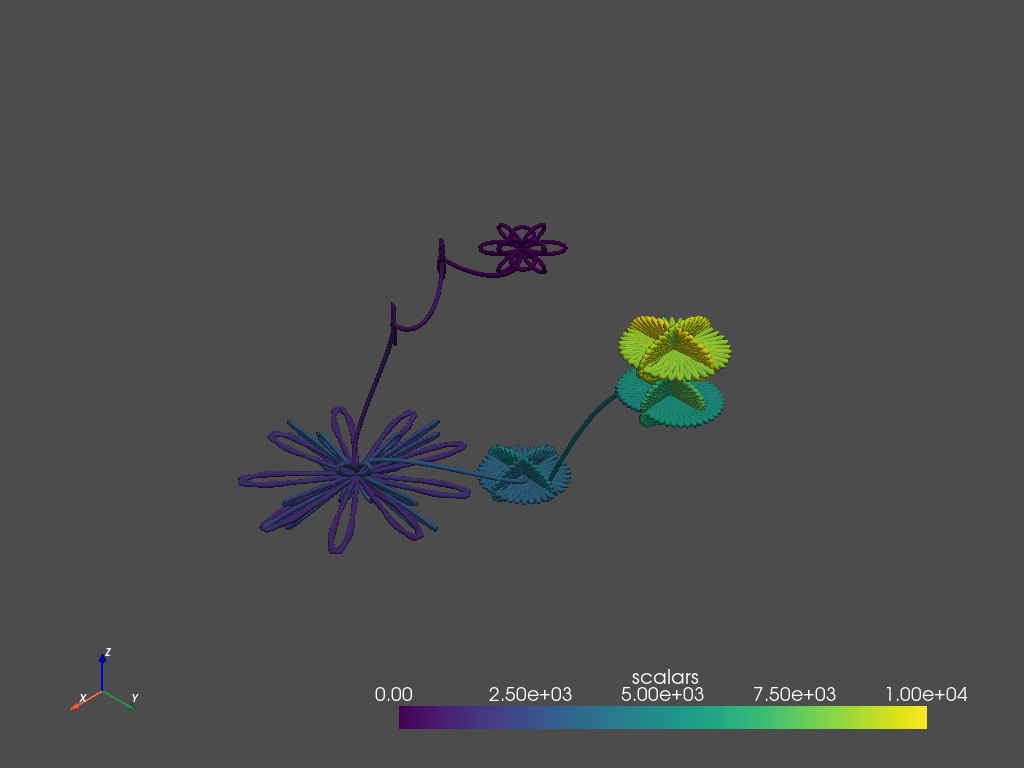

In [126]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 2
f = 2
n_points = 400

points = [0]

points = objct(points,A,f,n_points,0,0,0)



# object 2

A = 1/10
f = 20
X = [10,0,3]
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# object 3

A = 1/100
f = 10
X = [20,5,3]
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# object 4

A = 5
f = 90
X = [25,5,-10]
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# object 5

A = 2
f = 20
X = [15,15,-10]
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# object 6

A = 2
f = 50
X = [15,30,6]
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# object 6

A = 1/2
f = 10
X = [15,30,10]
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# object 6

A = 2
f = 20
X = [15,30,10]
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2])



# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


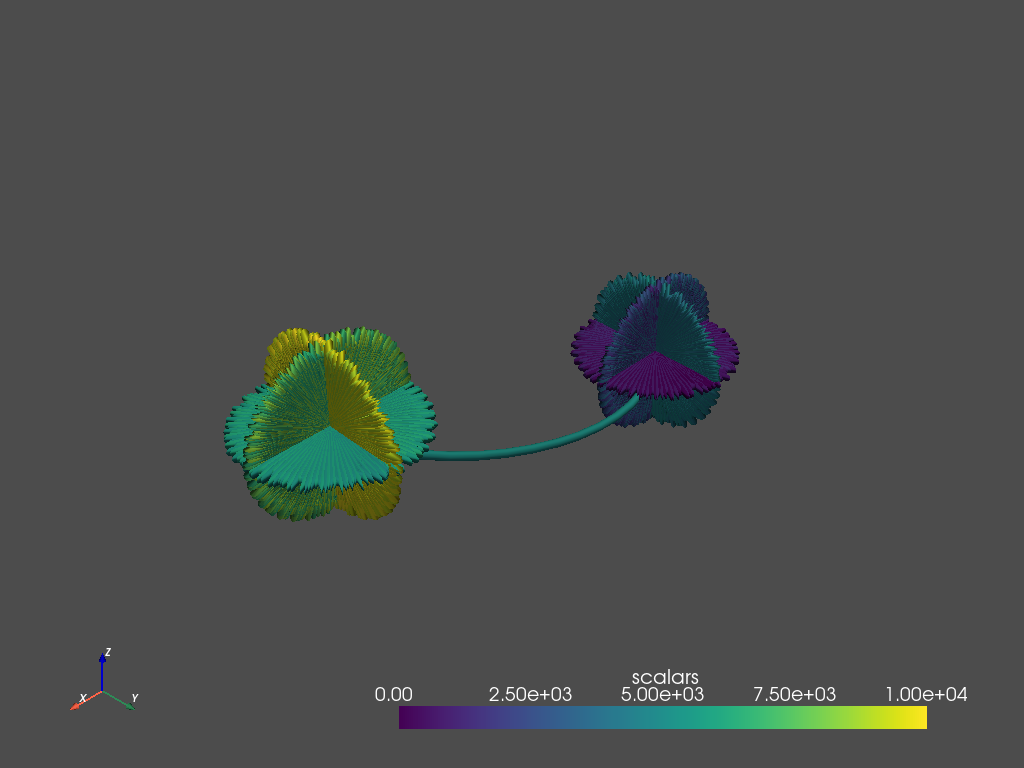

In [127]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 1
f = 100
n_points = 1000

points = [0]

points = objct(points,A,f,n_points,0,0,0)



# object 2

A = 1
f = 100
X = [10,0,3]
n_points = 1000

points = objct(points,A,f,n_points,X[0],X[1],X[2])



# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

## Model planets

In [128]:
n = 2 # for Earth

print(np.log(eT[n]))
print(np.log(e_orb[n]))
print(np.log(e_free[n]))

print(np.log(n_freeMG[n]))
print(np.log(n_freeTH[n]))

print(np.log(Volume[n]))

117.99084612076264
61.26330295482904
117.99084612076264
98.1356125550449
117.99084611838042
48.43420657605083


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


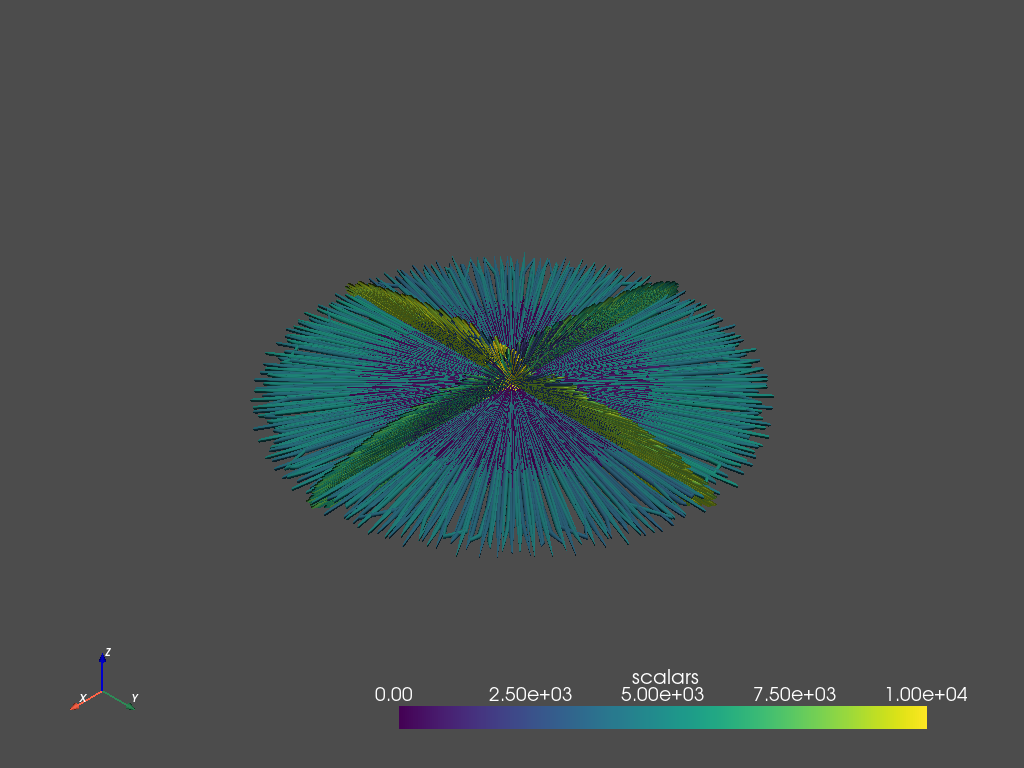

In [129]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

points = [0]

# Earth
n=2

# Magnetic electrons

A = np.log(n_freeMG[n]/e_orb[n])/10
f = np.log(n_freeMG[n])
X = [0,0,0]
n_points = 1000

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# Thermal electrons

A = np.log(n_freeTH[n]/e_orb[n])/10
f = np.log(n_freeTH[n])
X = [0,0,0]
n_points = 1000

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# Orbital electrons

A = 1
f = np.log(e_orb[n])
X = [0,0,0]
n_points = 1000

points = objct(points,A,f,n_points,X[0],X[1],X[2])





# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


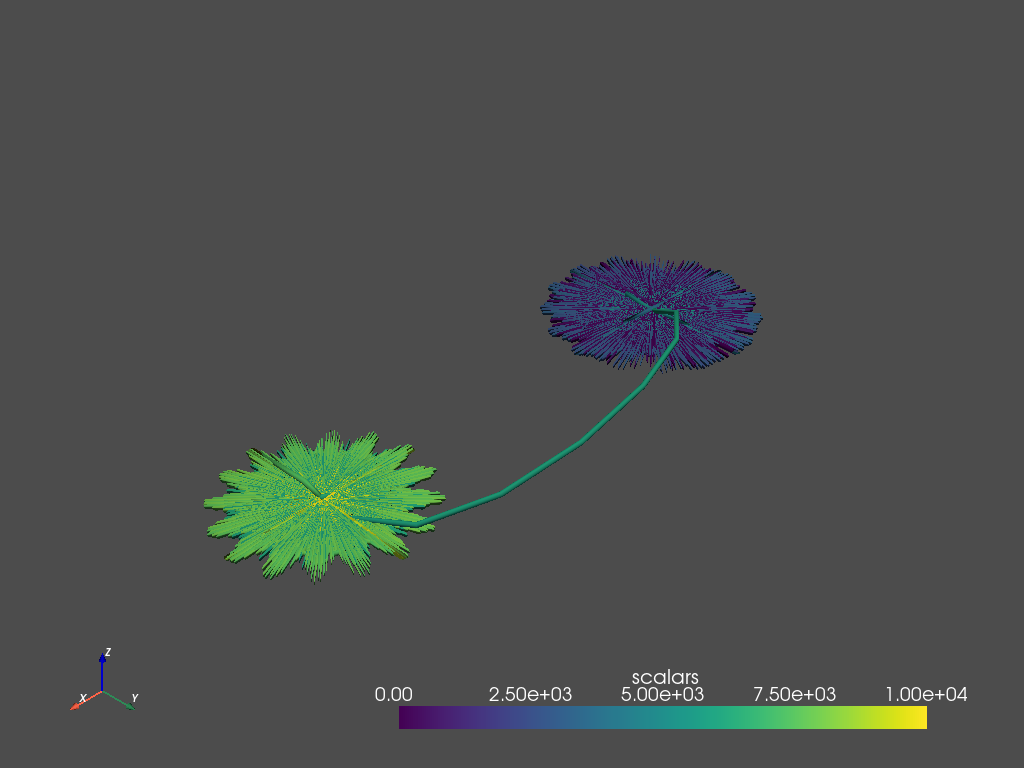

In [130]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

points = [0]

# Sun
n=9

# Magnetic electrons

A = np.log(n_freeMG[n])
f = np.log(n_freeMG[n])
X = [0,0,0]
n_points = 1000

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# Thermal electrons

A = np.log(n_freeTH[n])
f = np.log(n_freeTH[n])
X = [0,0,0]
n_points = 1000

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# Orbital electrons

A = np.log(e_orb[n])
f = np.log(e_orb[n])
X = [0,0,0]
n_points = 1000

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# Earth
n=2

# Magnetic electrons

A = np.log(n_freeMG[n])
f = np.log(n_freeMG[n])
X = [1000*Sun_distance[n],0,0]
n_points = 1000

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# Thermal electrons

A = np.log(n_freeTH[n])
f = np.log(n_freeTH[n])
n_points = 1000

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# Orbital electrons

A = np.log(e_orb[n])
f = np.log(e_orb[n])
n_points = 1000

points = objct(points,A,f,n_points,X[0],X[1],X[2])


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

## Forces

In [131]:
def objct(points,A,f,n_points,X,Y,Z,object_force):

  T = 1/f
  # Horizontal ring


  theta = np.linspace(-np.pi, np.pi, n_points)
  z = np.linspace(0, 0, n_points)
  r = (np.sin(f*theta))+(np.sin(f*theta)) + object_force
  x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
  y = r * np.cos(theta)*A
  if len(points) == 1:
    points = np.column_stack((x+X, y+Y, z+Z))
  else:
    points = np.concatenate((points,np.column_stack((x+X, y+Y, z+Z))))
    

  # Vertical ring

  theta = np.linspace(-np.pi, np.pi, n_points)
  r = np.sin(f*theta)+np.sin(f*theta)
  z = r * np.cos(theta) 
  x = A * r * np.sin(theta)
  y = A * np.linspace(0, 0, n_points)
  points = np.concatenate((points,np.column_stack((x+X, y+Y, z+Z))))


  theta = np.linspace(-np.pi, np.pi, n_points)
  r = np.sin(f*theta)+np.sin(f*theta)
  z = r * np.cos(theta) 
  x = A * r * np.sin(theta)
  y = A * np.linspace(0, 0, n_points)
  points = np.concatenate((points,np.column_stack((x+X, y+Y, z+Z))))

  import scipy

  rotation_degrees = 90
  rotation_radians = np.radians(rotation_degrees)
  rotation_axis = np.array([0, 0, 1])

  rotation_vector = rotation_radians * rotation_axis
  rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
  rotated_vec = rotation.apply(np.column_stack((x, y, z)))
  rotated_vec[:,0] = rotated_vec[:,0] + X  # xaxis
  rotated_vec[:,1] = rotated_vec[:,1] + Y  # yaxis
  rotated_vec[:,2] = rotated_vec[:,2] + Z  # zaxis
  points = np.concatenate((points,rotated_vec))

  return points

3


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


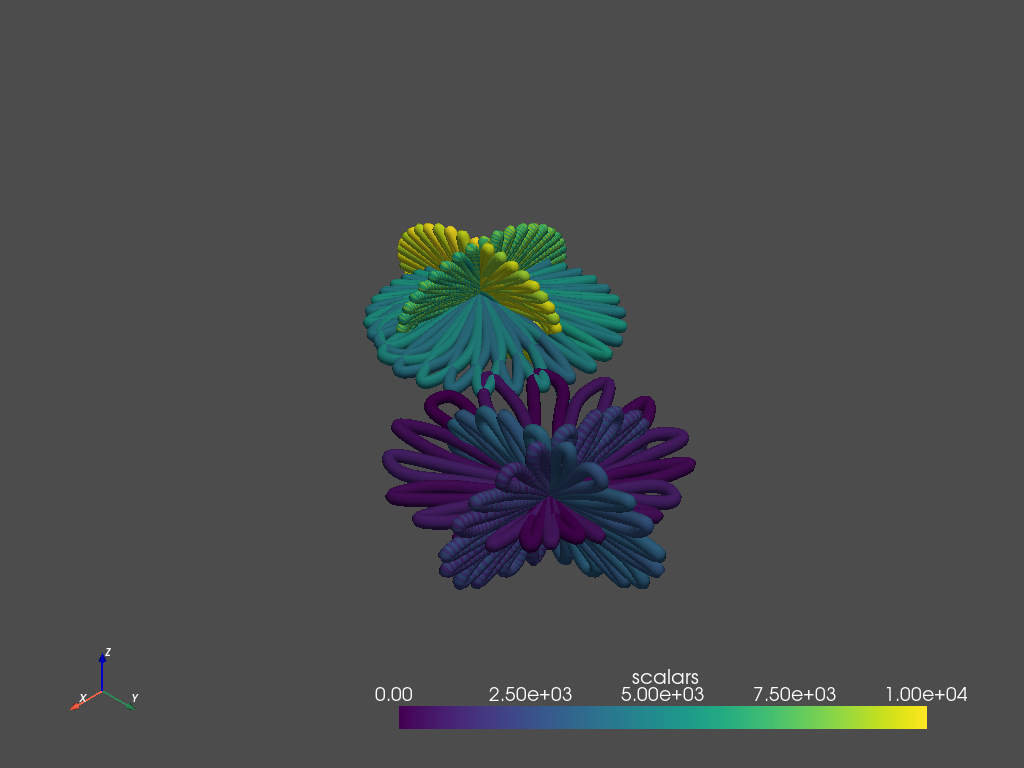

In [132]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

n_points = 100
points = [0]
theta = np.linspace(-np.pi, np.pi, n_points)

X2 = [2,1,0]
X1 = [8,10,0]

angle = np.arctan((X2[1]-X1[1])/(X2[0]-X1[0]))
if X2[0] == X1[0]:
  angle = 0

print(sum(X2))

a = 0
if X2[0]<X1[0]:
  a = 1

# object

A = 2
f = 10

n_points = 100

force12 = np.sin(theta+angle+a*np.pi)

points = objct(points,A,f,n_points,X1[0],X1[1],X1[2],force12)


# object

A = 2
f = 20

n_points = 100
force21 = np.sin(theta+angle+(1-a)*np.pi)

points = objct(points,A,f,n_points,X2[0],X2[1],X2[2],force21)



# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

## Planets with forces

68.56392016109227


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


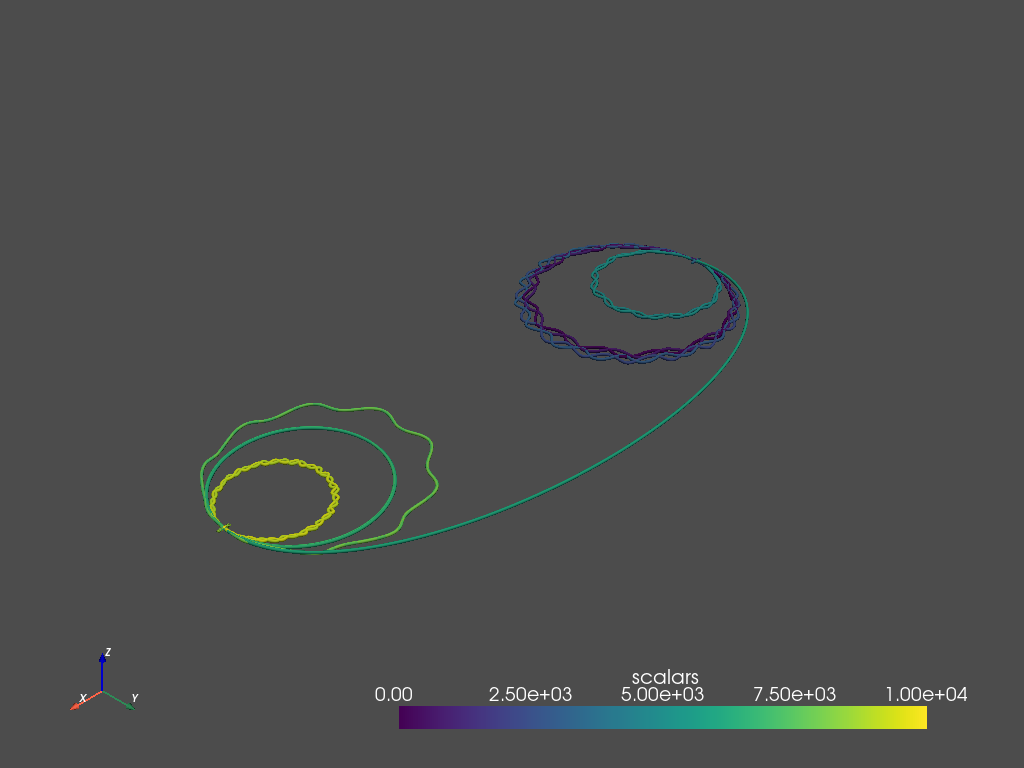

In [133]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

points = [0]

X1 = [0,0,0]
X2 = [25000*Sun_distance[n],0,0]

charge = e_orb[2]*e_orb[9]*(1.6E-19)**2
distance = np.sqrt((X2[0]-X1[0])**2+(X2[1]-X1[1])**2+(X2[2]-X1[2])**2)/1000
F = np.log(8.9875517923E9*charge/distance**2)

print(F)

angle = np.arctan((X2[1]-X1[1])/(X2[0]-X1[0]))
if X2[0] == X1[0]:
  angle = 0

a = 0
if X2[0]<X1[0]:
  a = 1

# Sun
n=9

# Magnetic electrons

A = np.log(n_freeMG[n])
f = np.log(n_freeMG[n])
X = X1
n_points = 100

force12 = F*np.sin(theta+angle+a*np.pi)

points = objct(points,A,f,n_points,X[0],X[1],X[2],force12)


# Thermal electrons

A = np.log(n_freeTH[n])
f = np.log(n_freeTH[n])
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2],force12)


# Orbital electrons

A = np.log(e_orb[n])
f = np.log(e_orb[n])
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2],force12)


# Earth
n=2

# Magnetic electrons

A = np.log(n_freeMG[n])
f = np.log(n_freeMG[n])
X = X2
n_points = 100

force21 = F*np.sin(theta+angle+(1-a)*np.pi)

points = objct(points,A,f,n_points,X[0],X[1],X[2],force21)


# Thermal electrons

A = np.log(n_freeTH[n])
f = np.log(n_freeTH[n])
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2],force21)


# Orbital electrons

A = np.log(e_orb[n])
f = np.log(e_orb[n])
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2],force21)


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=10*5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

In [134]:
n = 2 # for Earth

print(np.log(eT[n]))
print(np.log(e_orb[n]))
print(np.log(e_free[n]))

print(np.log(n_freeMG[n]))
print(np.log(n_freeTH[n]))

print(np.log(Volume[n]))

117.99084612076264
61.26330295482904
117.99084612076264
98.1356125550449
117.99084611838042
48.43420657605083


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


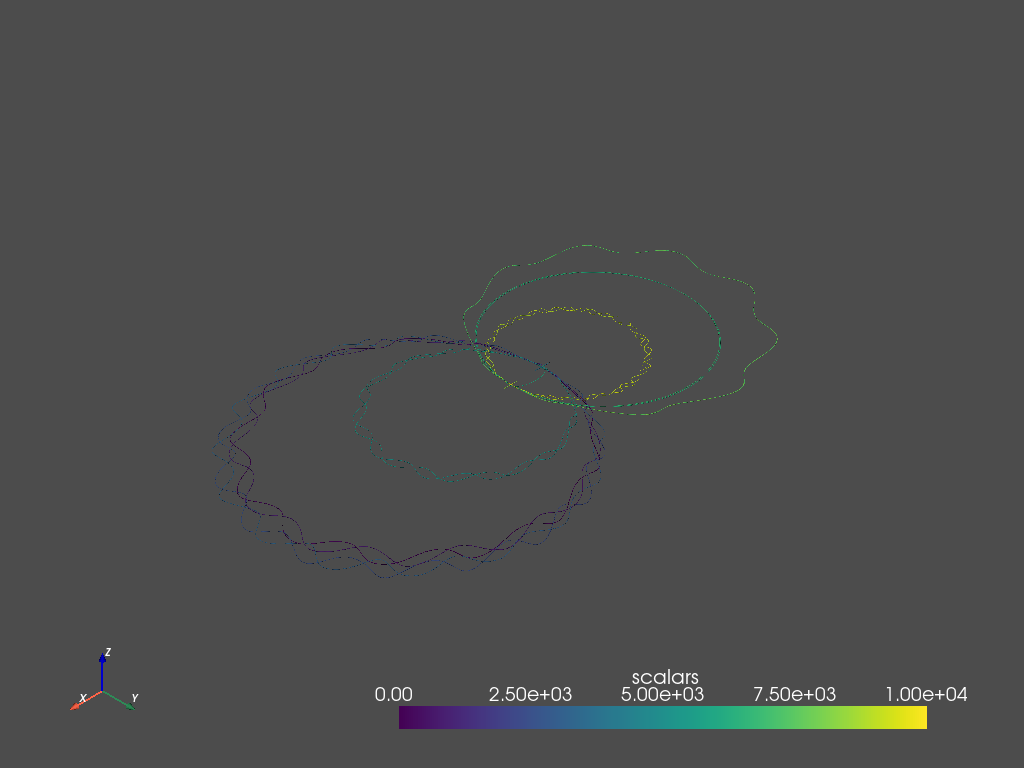

In [135]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

points = [0]

X1 = [0,0,0]
X2 = [1000*Sun_distance[n],0,0]

charge = e_orb[2]*e_orb[9]*(1.6E-19)**2
distance = np.sqrt((X2[0]-X1[0])**2+(X2[1]-X1[1])**2+(X2[2]-X1[2])**2)
F = np.log(8.9875517923E9*charge/distance**2)

angle = np.arctan((X2[1]-X1[1])/(X2[0]-X1[0]))
if X2[0] == X1[0]:
  angle = 0

a = 0
if X2[0]<X1[0]:
  a = 1

# Sun
n=9

# Magnetic electrons

A = np.log(n_freeMG[n])
f = np.log(n_freeMG[n])
X = X1
n_points = 100

force12 = F*np.sin(theta+angle+a*np.pi)

points = objct(points,A,f,n_points,X[0],X[1],X[2],force12)


# Thermal electrons

A = np.log(n_freeTH[n])
f = np.log(n_freeTH[n])
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2],force12)


# Orbital electrons

A = np.log(e_orb[n])
f = np.log(e_orb[n])
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2],force12)


# Earth
n=2

# Magnetic electrons

A = np.log(n_freeMG[n])
f = np.log(n_freeMG[n])
X = X2
n_points = 100

force21 = F*np.sin(theta+angle+(1-a)*np.pi)

points = objct(points,A,f,n_points,X[0],X[1],X[2],force21)


# Thermal electrons

A = np.log(n_freeTH[n])
f = np.log(n_freeTH[n])
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2],force21)


# Orbital electrons

A = np.log(e_orb[n])
f = np.log(e_orb[n])
n_points = 100

points = objct(points,A,f,n_points,X[0],X[1],X[2],force21)


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

## Particles

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


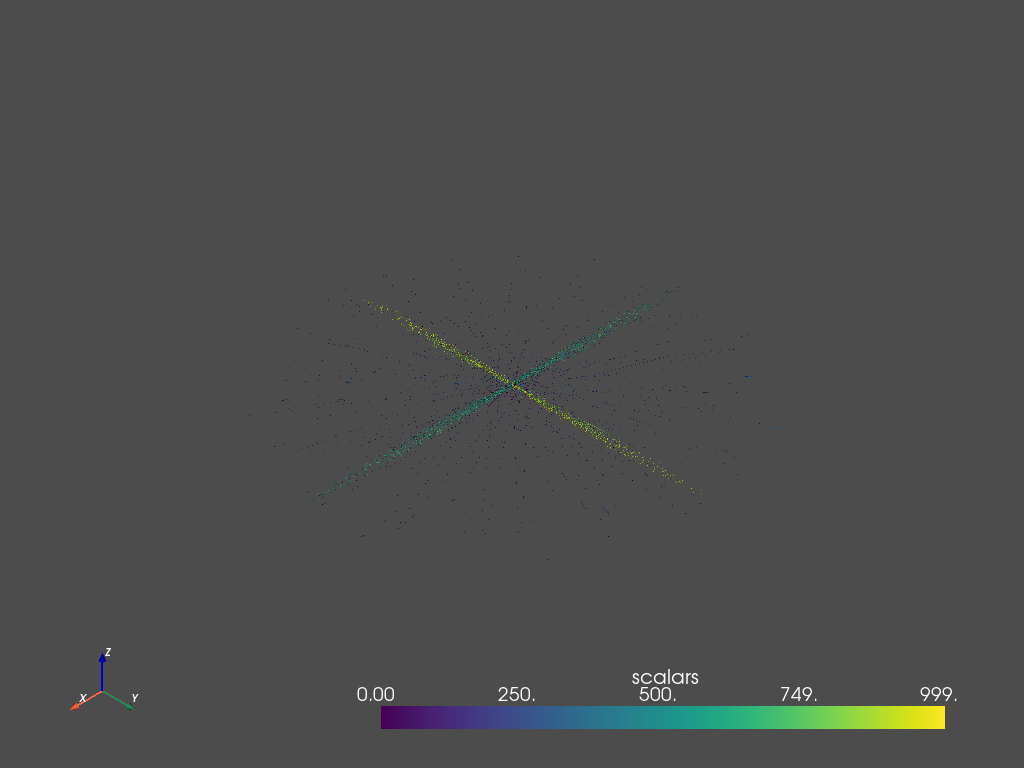

In [136]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 20
f = 40

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# object 2

A = 1/20
f = 20

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.concatenate((points,np.column_stack((x, y, z))))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


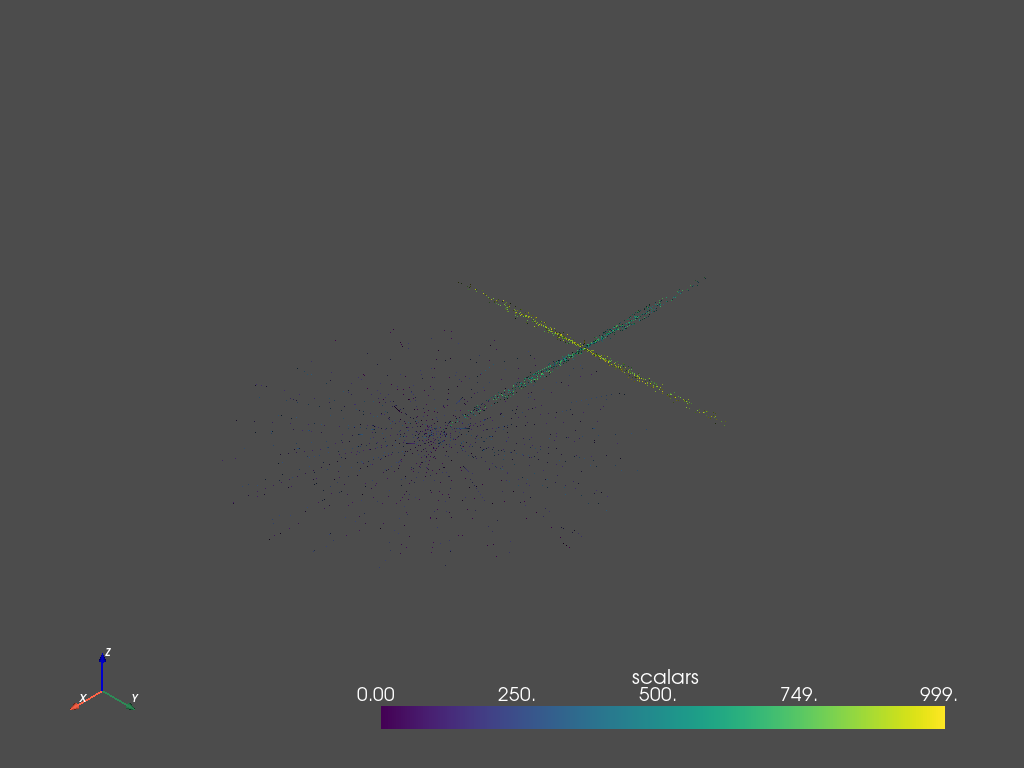

In [137]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 20
f = 40

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.column_stack((x+2*A, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# object 2

A = 1/20
f = 20

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.concatenate((points,np.column_stack((x, y, z))))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


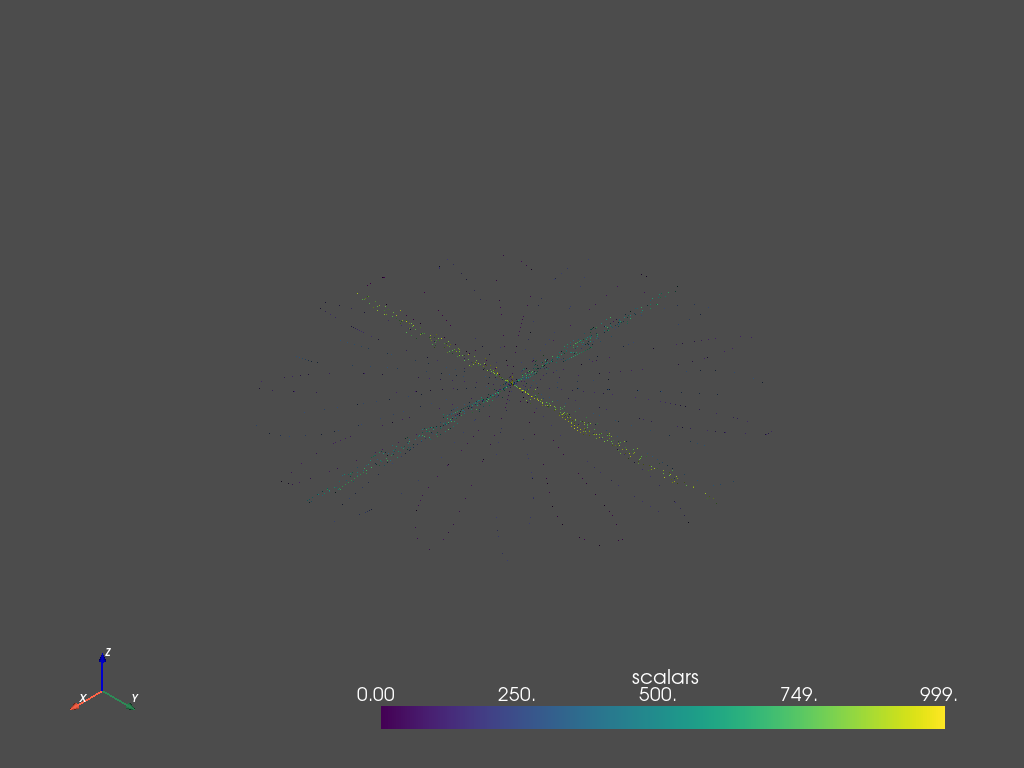

In [138]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 20
f = 10

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# object 2

A = 1/20
f = 20

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.concatenate((points,np.column_stack((x, y, z))))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


## Curved Line

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


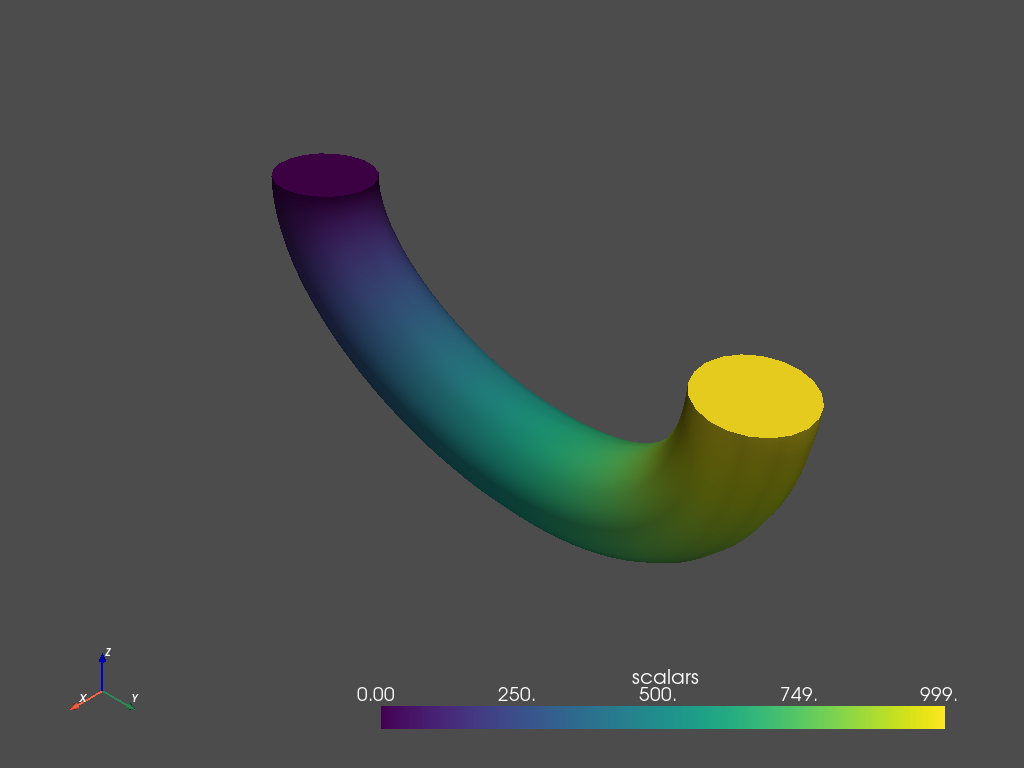

In [139]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

A = 1
f = 99

T = 1/f

# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x+A, y, z))) # changes to line by translation of A


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


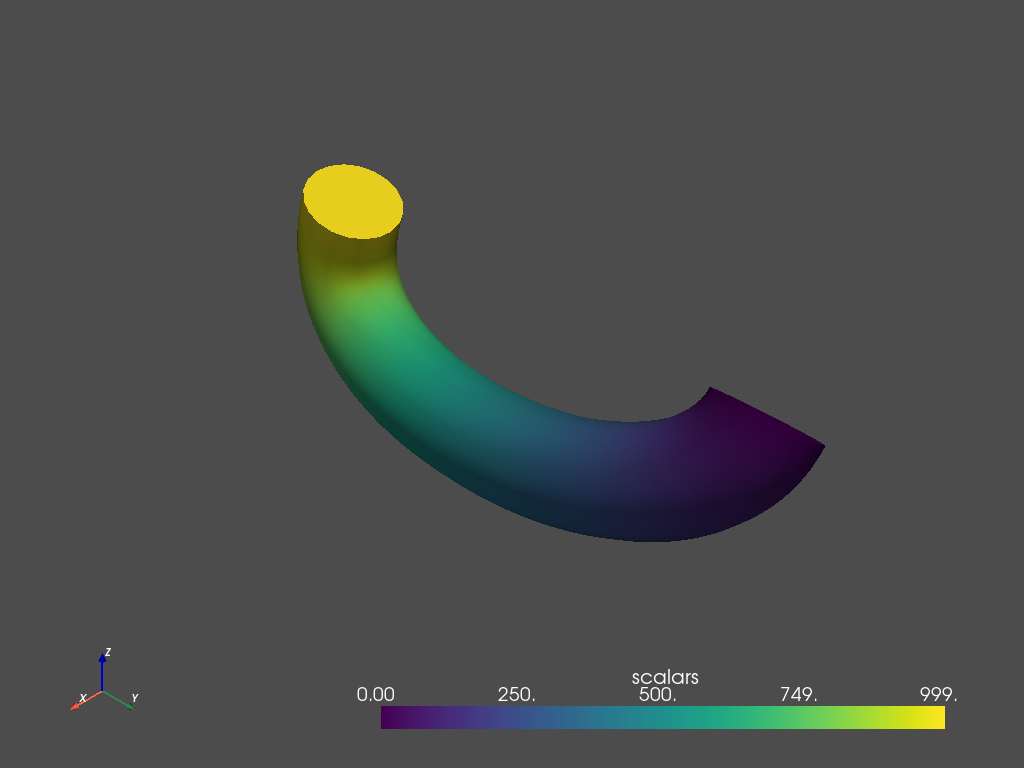

In [140]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

A = 9
f = 99

T = 1/f

# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x-A, y, z))) # changes to line


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# Create spline with 1000 interpolation points
spline = pv.Spline(points, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


# Exponential quantum relativity

## Initialise

In [271]:
import numpy as np
import matplotlib.pyplot as plt

In [272]:
def factorial(x):
  factorial = 1
  if int(x) >= 1:
    for i in range (1,int(x)+1):
      factorial = factorial * i
  return factorial

In [273]:
def exp(x,n):
  exp = 0
  for i in range (0,n):
    exp += (1/factorial(i))
  return exp**x

In [274]:
n = 100

def E(x,n):
  return W*exp(2*f*np.pi*x,n)

def E2(x,n):
  return W*exp(2*f*np.pi*x-0.5j*np.pi,n)

def S(x):
  return W*exp(2*f*np.pi*x*1j-np.pi*0.5j,n)

def C(x):
  return W*exp(2*f*np.pi*x*1j,n)

def Electromagnetism(x):
  return S(E(x))

def ElectronWave(x):
  return C(C(x))

def LifeWave(x):
  return S(C(x))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


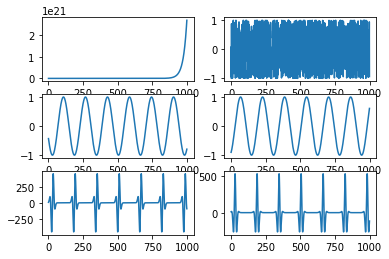

In [275]:
W = 1 # 1/1000 Volumatic # 10 lines # 25 particles # 1 normal
f = 1
L = 1000

# x = np.linspace(0, 1, L)
# w1/10, f1/10 (Default/volume)
# w1, f1 (Default/string)
# w5, f5 (Default/particles)

# w1,f100 (DNA)
# w25,f25,f100 (Particles)
# w10,f10,f99 (Particles/Lines)
# w 1/1000,f1, f25 (Volumes)

# w1, f1/(2*np.pi) x = np.linspace(np.pi/2, 5*np.pi/2, L)

x = np.linspace(0, 1, L)
x = np.linspace(np.pi/2, 5*np.pi/2, L)

phase = -0/(4*f)

fig, axs = plt.subplots(3, 2)

axs[0,0].plot(E(x+phase,n)) # exponential
axs[1,1].plot(C(x+phase)) # cos
axs[1,0].plot(S(x+phase)) # sine

axs[0,1].plot(S(E(x+phase,n))) # electromagnetic spectrum

axs[2,1].plot(C(C(x+phase))) # electron beat
axs[2,0].plot(S(C(x+phase))) # heart beat

## Sphere

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


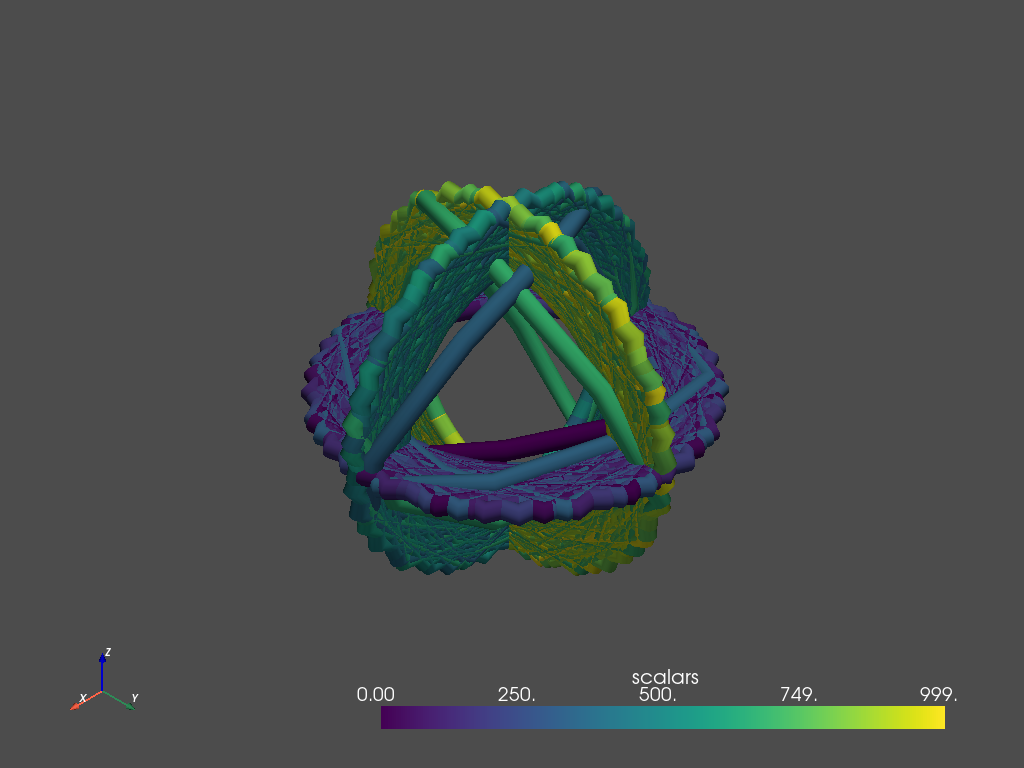

In [276]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 1
f = 2

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))





import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))






# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


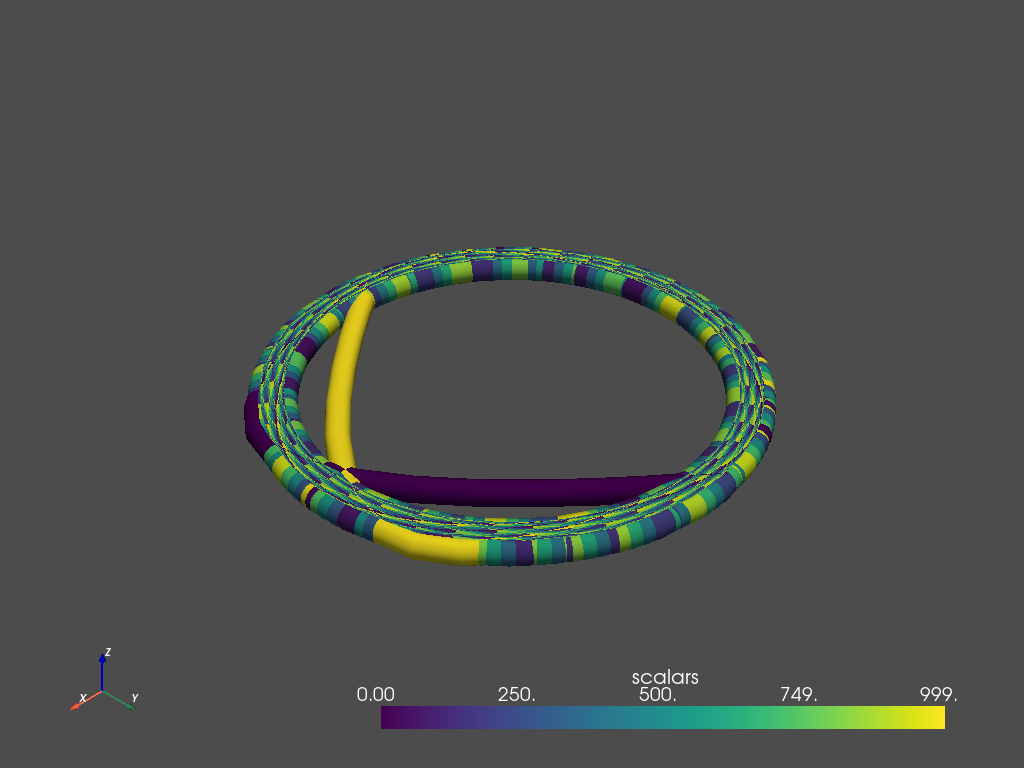

In [277]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 1
f = 99

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))




# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


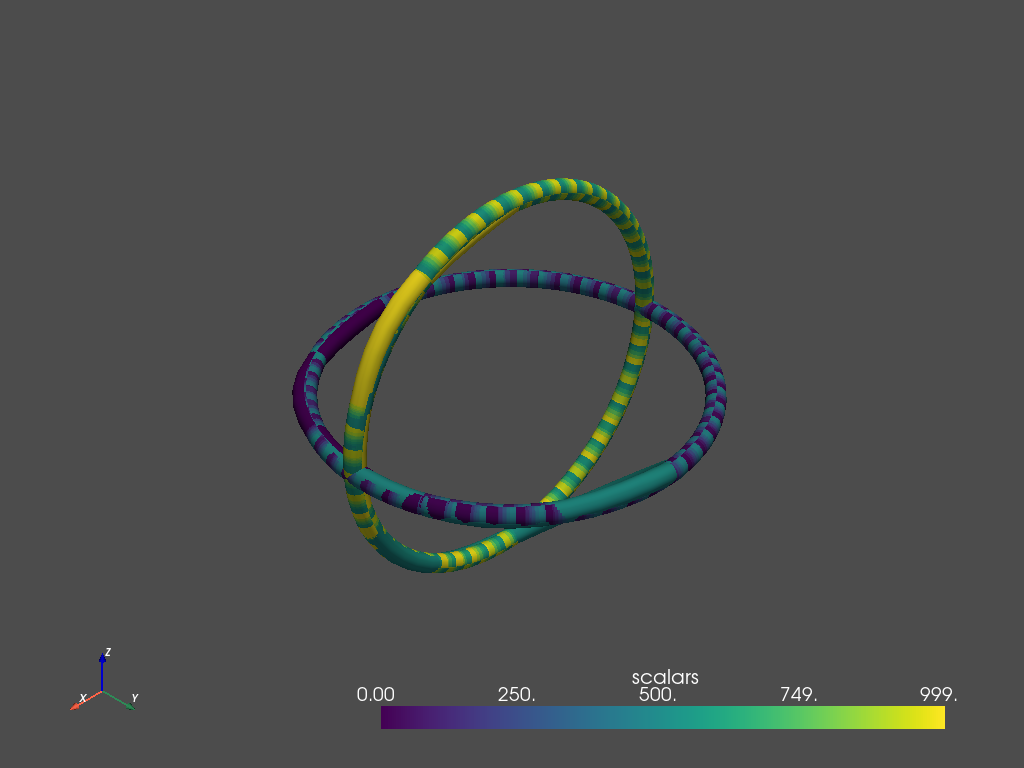

In [278]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 1
f = 5

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))






# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


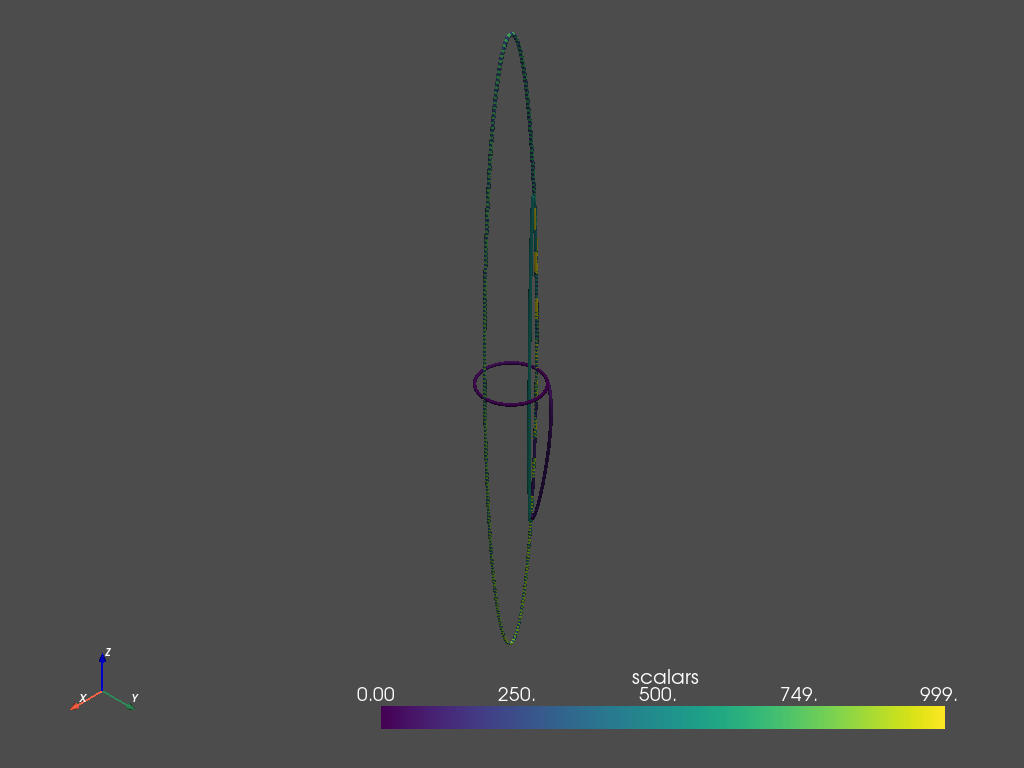

In [279]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 1/10
f = 100

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


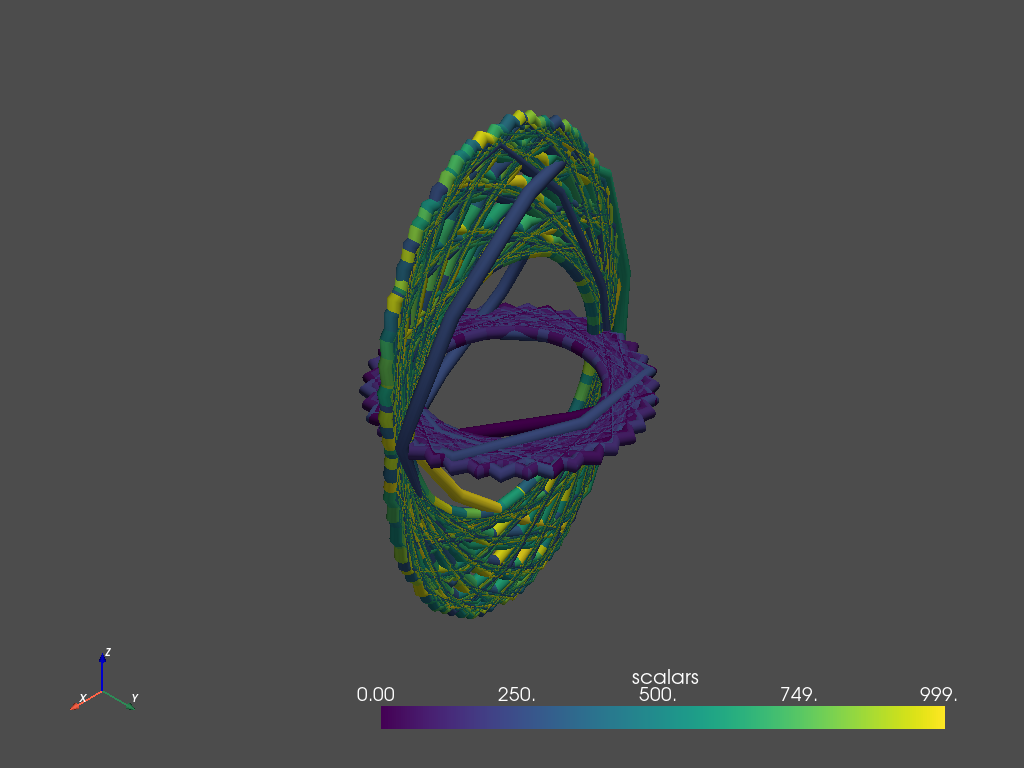

In [280]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 1/2
f = 2

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


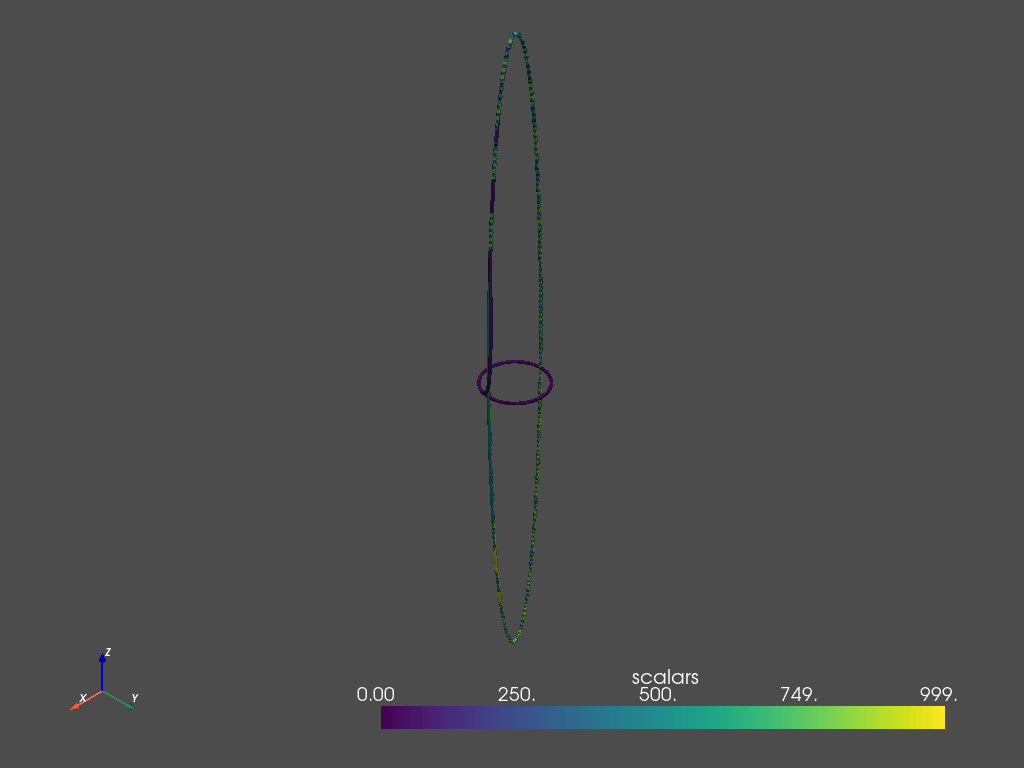

In [281]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 1/10
f = 10

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


## Rings

### Real

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


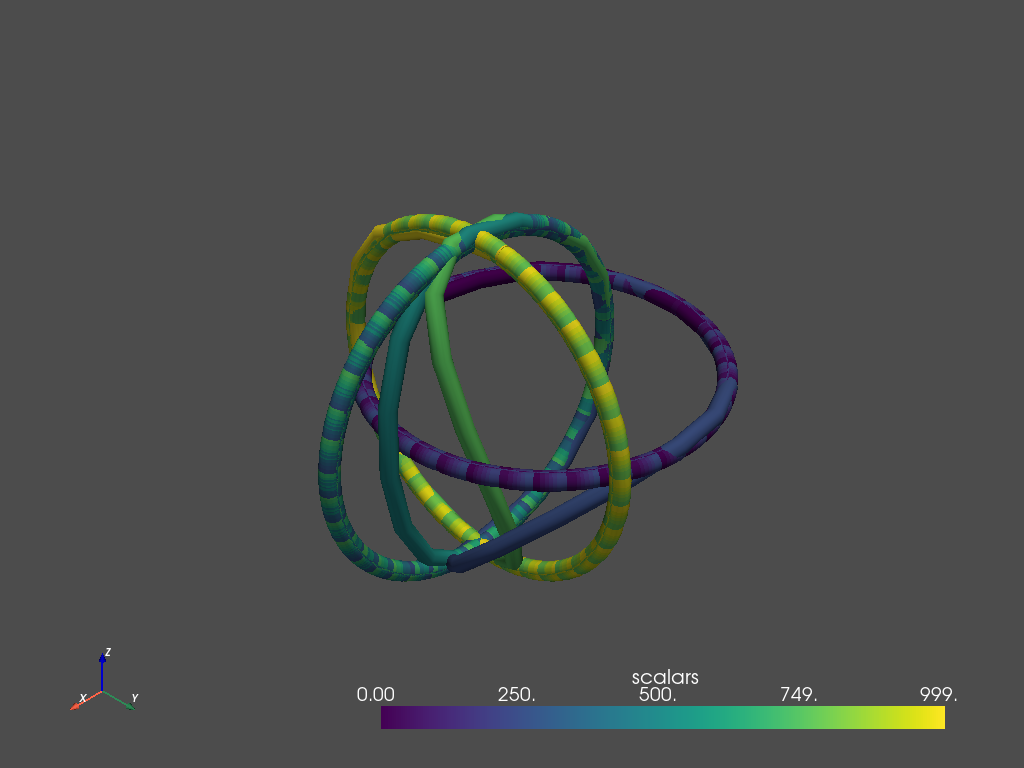

In [283]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 1
f = 1

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


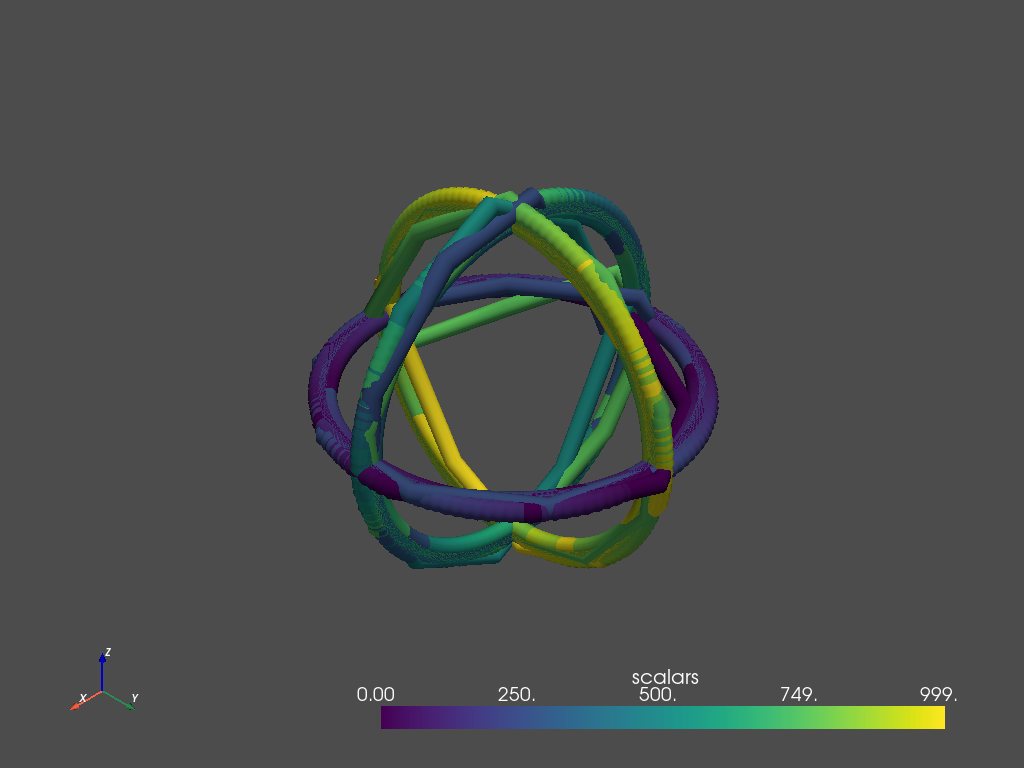

In [284]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 1
f = 25

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


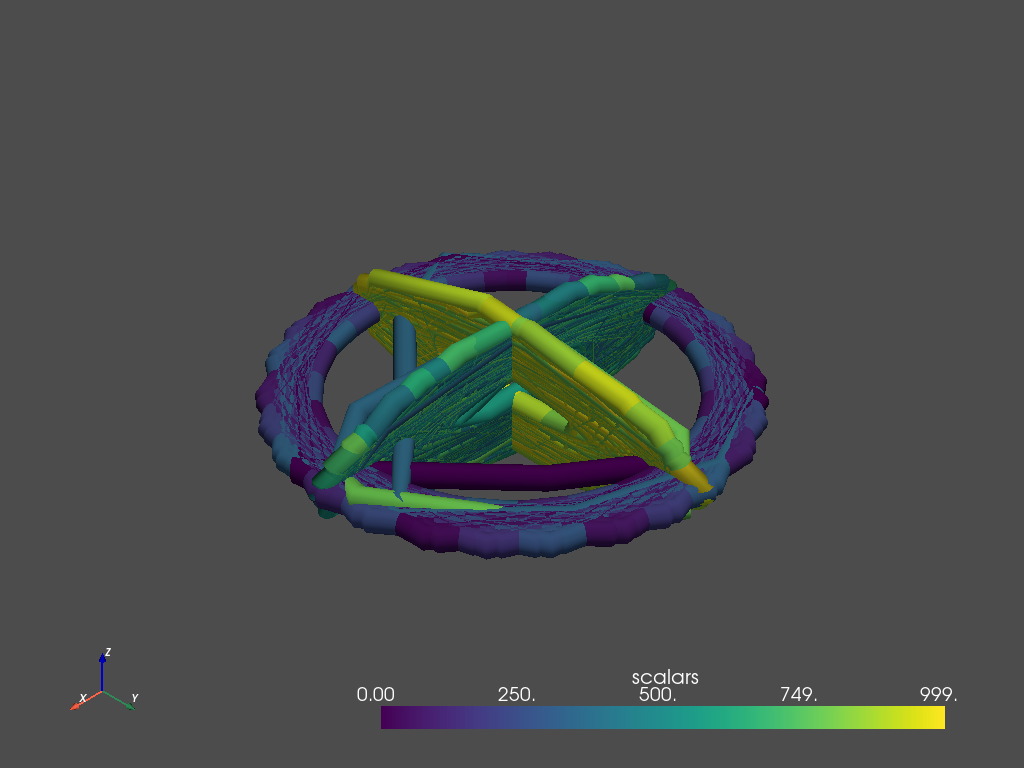

In [285]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 10
f = 20

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


### Imaginary

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


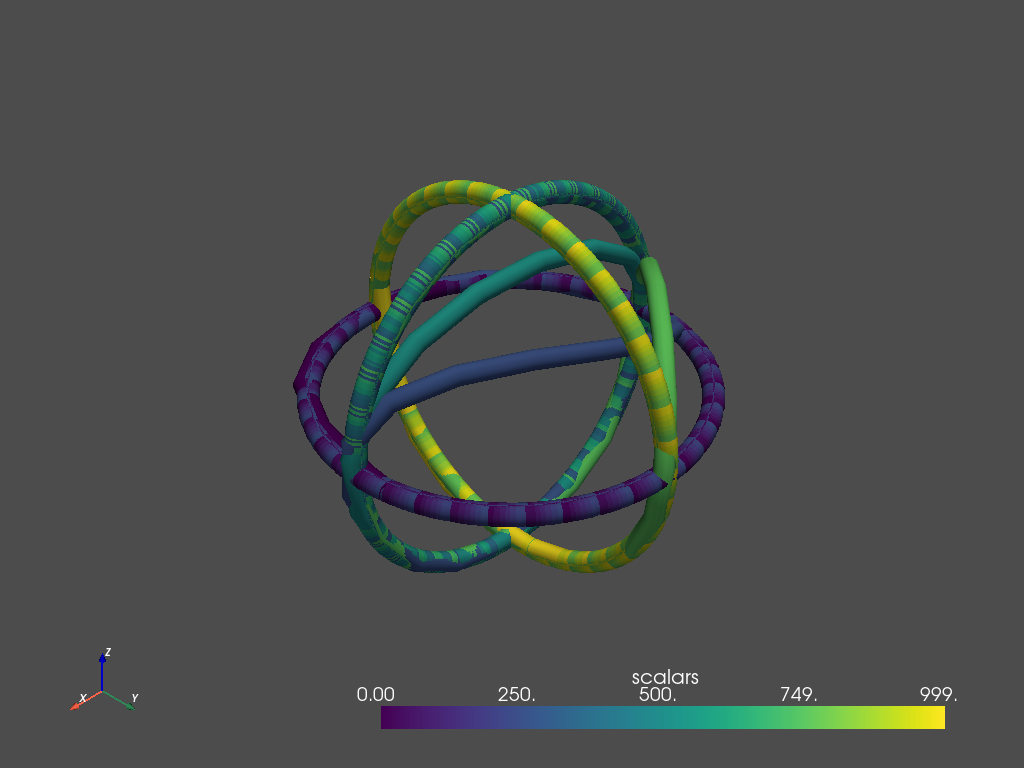

In [286]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 1
f = 1

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))






# Create spline with 1000 interpolation points
spline = pv.Spline(points.imag, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


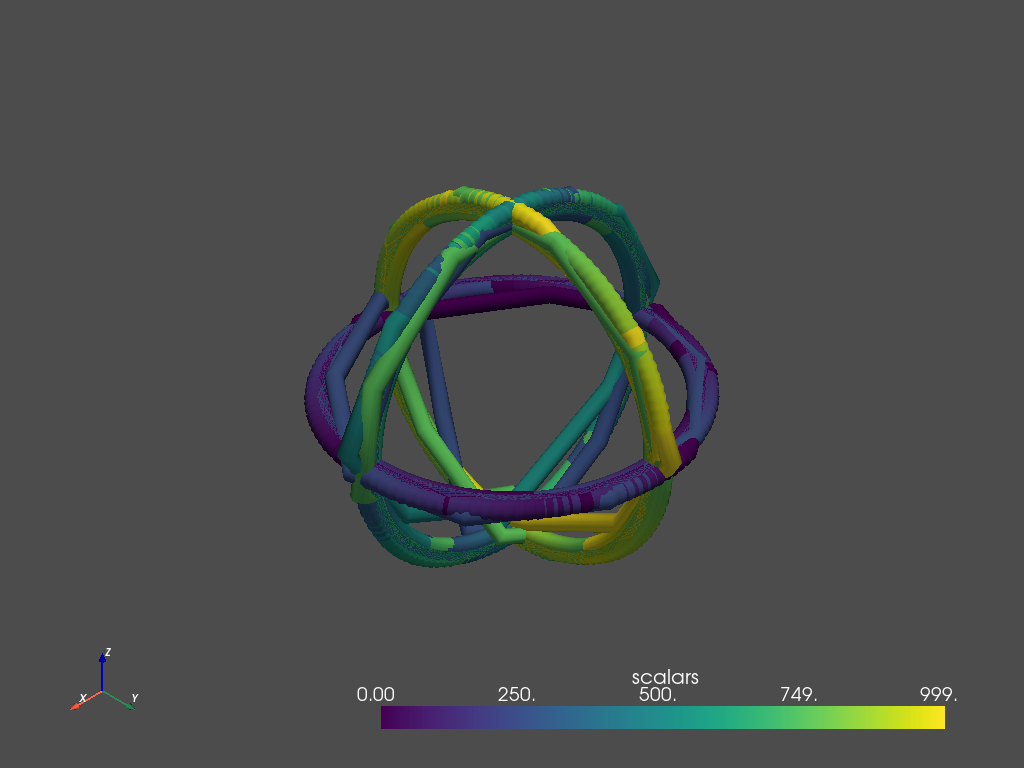

In [287]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 1
f = 25

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# Create spline with 1000 interpolation points
spline = pv.Spline(points.imag, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


## Two relative models

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


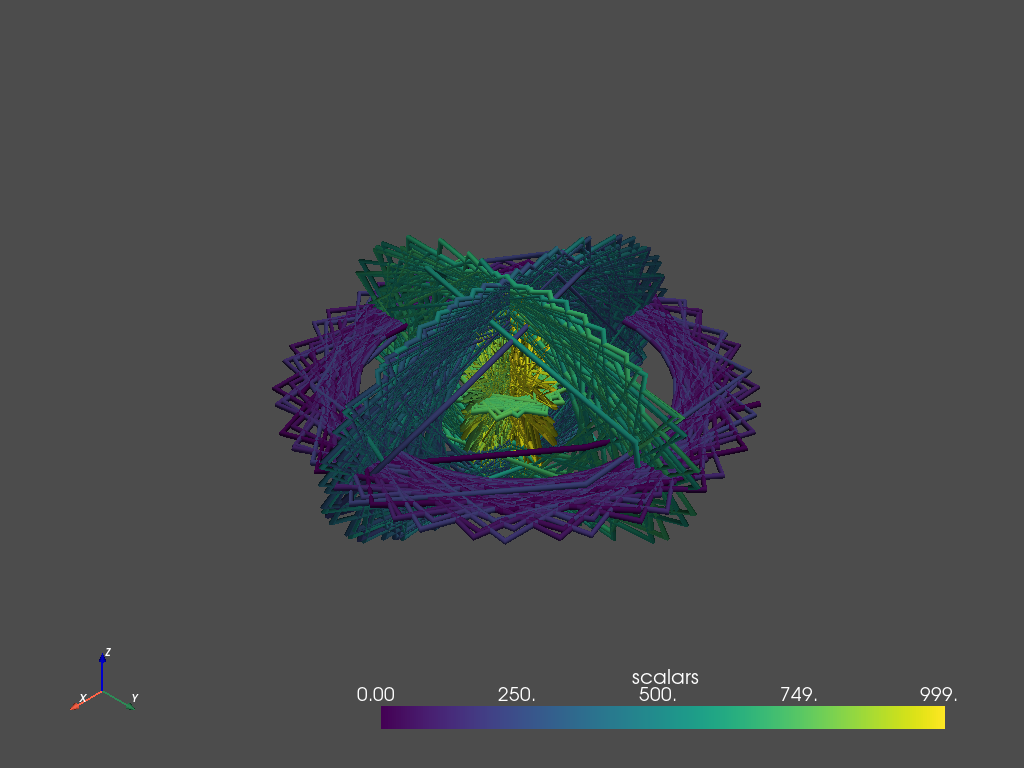

In [288]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 2
f = 2

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# object 2

A = 1/2
f = 2

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.concatenate((points,np.column_stack((x, y, z))))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


## Object

In [289]:
def objct2(points,A,f,n_points,X,Y,Z):

  T = 1/f
  # Horizontal ring


  theta = np.linspace(-np.pi, np.pi, n_points)
  z = np.linspace(0, 0, n_points)
  r = (S(f*theta))+(S(f*theta))
  x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
  y = r * C(theta)*A
  if len(points) == 1:
    points = np.column_stack((x+X, y+Y, z+Z))
  else:
    points = np.concatenate((points,np.column_stack((x+X, y+Y, z+Z))))
    

  # Vertical ring

  theta = np.linspace(-np.pi, np.pi, n_points)
  r = S(f*theta)+S(f*theta)
  z = r * C(theta) 
  x = A * r * S(theta)
  y = A * np.linspace(0, 0, n_points)
  points = np.concatenate((points,np.column_stack((x+X, y+Y, z+Z))))


  theta = np.linspace(-np.pi, np.pi, n_points)
  r = S(f*theta)+S(f*theta)
  z = r * C(theta) 
  x = A * r * S(theta)
  y = A * np.linspace(0, 0, n_points)
  points = np.concatenate((points,np.column_stack((x+X, y+Y, z+Z))))

  import scipy

  rotation_degrees = 90
  rotation_radians = np.radians(rotation_degrees)
  rotation_axis = np.array([0, 0, 1])

  rotation_vector = rotation_radians * rotation_axis
  rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
  rotated_vec = rotation.apply(np.column_stack((x, y, z)))
  rotated_vec[:,0] = rotated_vec[:,0] + X  # xaxis
  rotated_vec[:,1] = rotated_vec[:,1] + Y  # yaxis
  rotated_vec[:,2] = rotated_vec[:,2] + Z  # zaxis
  points = np.concatenate((points,rotated_vec))

  return points

## Modelling

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


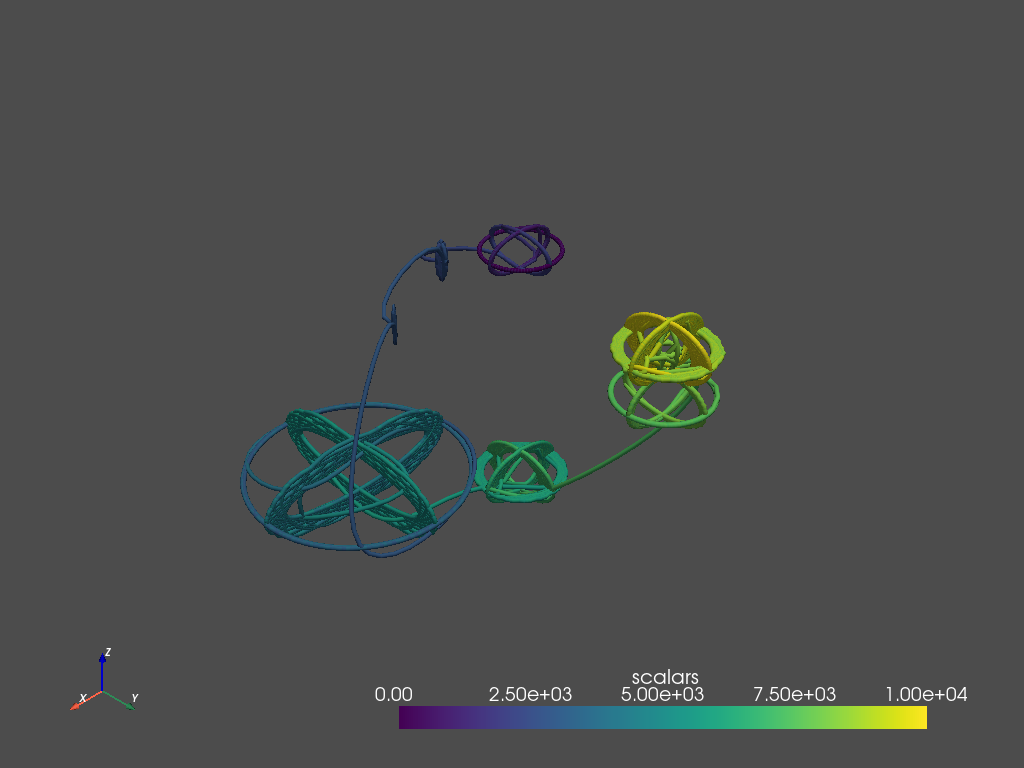

In [290]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 2
f = 2
n_points = 400

points = [0]

points = objct2(points,A,f,n_points,0,0,0)



# object 2

A = 1/10
f = 20
X = [10,0,3]
n_points = 100

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# object 3

A = 1/100
f = 10
X = [20,5,3]
n_points = 100

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# object 4

A = 5
f = 90
X = [25,5,-10]
n_points = 100

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# object 5

A = 2
f = 20
X = [15,15,-10]
n_points = 100

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# object 6

A = 2
f = 50
X = [15,30,6]
n_points = 100

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# object 6

A = 1/2
f = 10
X = [15,30,10]
n_points = 100

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# object 6

A = 2
f = 20
X = [15,30,10]
n_points = 100

points = objct2(points,A,f,n_points,X[0],X[1],X[2])



# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

## Model planets

In [291]:
n = 2 # for Earth

print(np.log(eT[n]))
print(np.log(e_orb[n]))
print(np.log(e_free[n]))

print(np.log(n_freeMG[n]))
print(np.log(n_freeTH[n]))

print(np.log(Volume[n]))

117.99084612076264
61.26330295482904
117.99084612076264
98.1356125550449
117.99084611838042
48.43420657605083


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


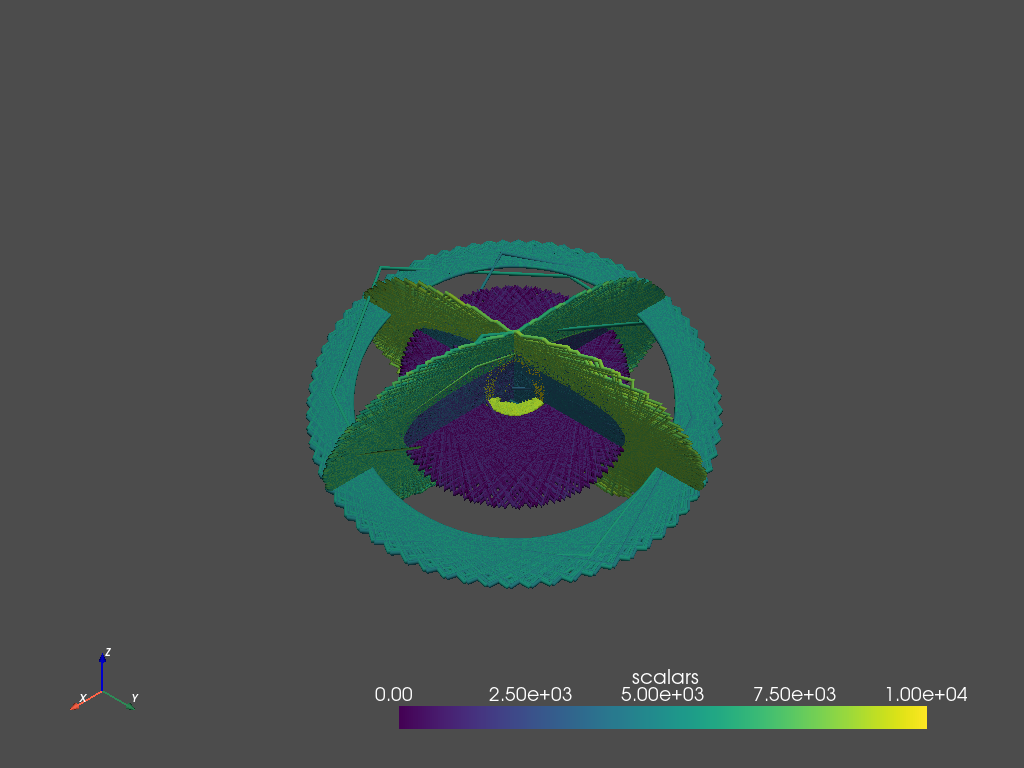

In [292]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

points = [0]

# Earth
n=2

# Magnetic electrons

A = np.log(n_freeMG[n]/e_orb[n])/10
f = np.log(n_freeMG[n])
X = [0,0,0]
n_points = 1000

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# Thermal electrons

A = np.log(n_freeTH[n]/e_orb[n])/10
f = np.log(n_freeTH[n])
X = [0,0,0]
n_points = 1000

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# Orbital electrons

A = 1
f = np.log(e_orb[n])
X = [0,0,0]
n_points = 1000

points = objct2(points,A,f,n_points,X[0],X[1],X[2])





# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points.imag, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


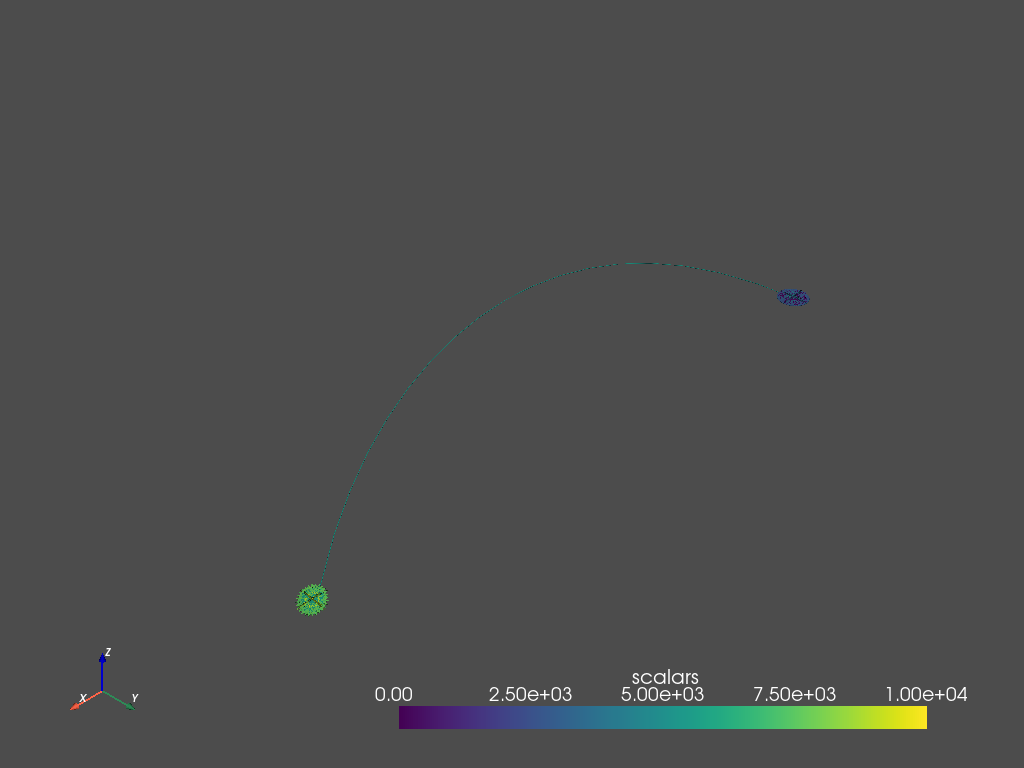

In [293]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

points = [0]

# Sun
n=9

# Magnetic electrons

A = np.log(n_freeMG[n])
f = np.log(n_freeMG[n])
X = [0,0,0]
n_points = 1000

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# Thermal electrons

A = np.log(n_freeTH[n])
f = np.log(n_freeTH[n])
X = [0,0,0]
n_points = 1000

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# Orbital electrons

A = np.log(e_orb[n])
f = np.log(e_orb[n])
X = [0,0,0]
n_points = 1000

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# Earth
n=2

# Magnetic electrons

A = np.log(n_freeMG[n])
f = np.log(n_freeMG[n])
X = [10000*Sun_distance[n],0,0]
n_points = 1000

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# Thermal electrons

A = np.log(n_freeTH[n])
f = np.log(n_freeTH[n])
n_points = 1000

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# Orbital electrons

A = np.log(e_orb[n])
f = np.log(e_orb[n])
n_points = 1000

points = objct2(points,A,f,n_points,X[0],X[1],X[2])


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

## Forces

In [294]:
def objct2(points,A,f,n_points,X,Y,Z,object_force):

  T = 1/f
  # Horizontal ring


  theta = np.linspace(-np.pi, np.pi, n_points)
  z = np.linspace(0, 0, n_points)
  r = (S(f*theta))+(S(f*theta)) + object_force
  x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
  y = r * C(theta)*A
  if len(points) == 1:
    points = np.column_stack((x+X, y+Y, z+Z))
  else:
    points = np.concatenate((points,np.column_stack((x+X, y+Y, z+Z))))
    

  # Vertical ring

  theta = np.linspace(-np.pi, np.pi, n_points)
  r = S(f*theta)+S(f*theta)
  z = r * C(theta) 
  x = A * r * S(theta)
  y = A * np.linspace(0, 0, n_points)
  points = np.concatenate((points,np.column_stack((x+X, y+Y, z+Z))))


  theta = np.linspace(-np.pi, np.pi, n_points)
  r = S(f*theta)+S(f*theta)
  z = r * C(theta) 
  x = A * r * S(theta)
  y = A * np.linspace(0, 0, n_points)
  points = np.concatenate((points,np.column_stack((x+X, y+Y, z+Z))))

  import scipy

  rotation_degrees = 90
  rotation_radians = np.radians(rotation_degrees)
  rotation_axis = np.array([0, 0, 1])

  rotation_vector = rotation_radians * rotation_axis
  rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
  rotated_vec = rotation.apply(np.column_stack((x, y, z)))
  rotated_vec[:,0] = rotated_vec[:,0] + X  # xaxis
  rotated_vec[:,1] = rotated_vec[:,1] + Y  # yaxis
  rotated_vec[:,2] = rotated_vec[:,2] + Z  # zaxis
  points = np.concatenate((points,rotated_vec))

  return points

### 2 bodies

19


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


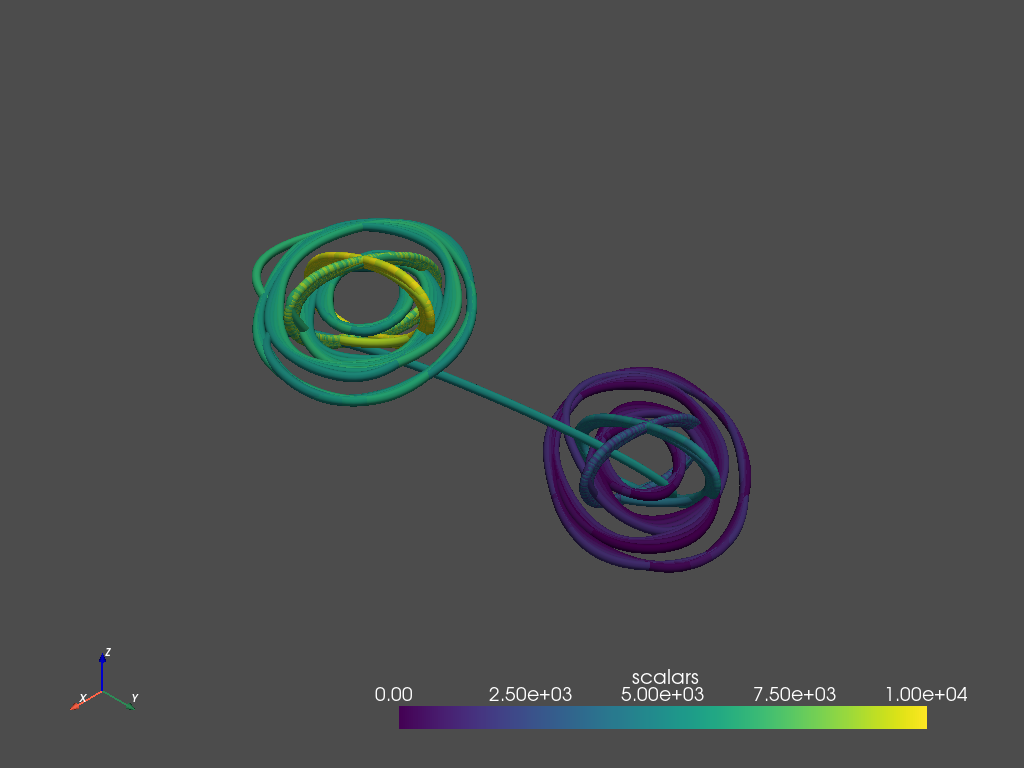

In [296]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

n_points = 100
points = [0]
theta = np.linspace(-np.pi, np.pi, n_points)

X2 = [10,1,8]
X1 = [2,10,0]


if X2[0] != X1[0]:
  angle = np.arctan((X2[1]-X1[1])/(X2[0]-X1[0]))
else:
  angle = 0

print(np.sum(X2))

a = 0
if X2[0]<X1[0]:
  a = 1

# object

A = 2
f = 10



force12 = S(theta+angle+a*np.pi)

points = objct2(points,A,f,n_points,X1[0],X1[1],X1[2],force12)


# object

A = 2
f = 10


force21 = S(theta+angle+(1-a)*np.pi)

points = objct2(points,A,f,n_points,X2[0],X2[1],X2[2],force21)



# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

## Planets with forces

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


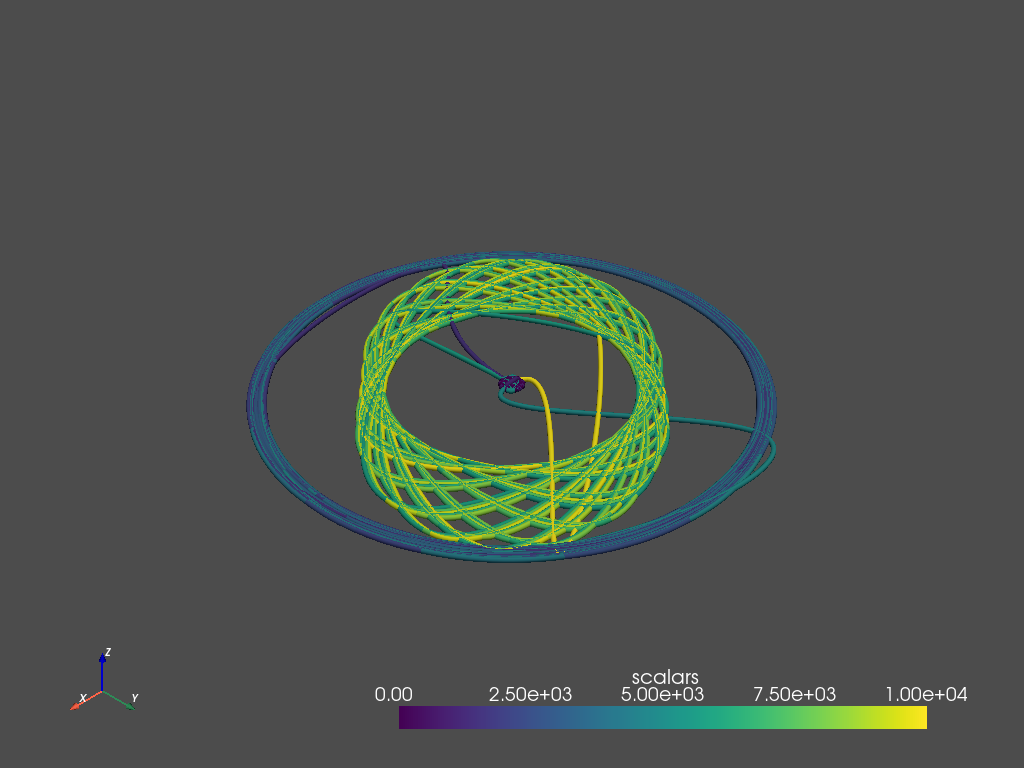

In [297]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

points = [0]

X1 = [0,0,0]
X2 = [Sun_distance[n],0,0]

distance = np.sqrt((X2[0]-X1[0])**2+(X2[1]-X1[1])**2+(X2[2]-X1[2])**2)

cm = n_freeMG[2]*n_freeMG[9]*(1.6E-19)**2
cth = n_freeTH[2]*n_freeTH[9]*(1.6E-19)**2
co = e_orb[2]*e_orb[9]*(1.6E-19)**2

Fm = np.log(8.9875517923E9*cm/distance**2)*0
Fth = np.log(8.9875517923E9*cth/distance**2)*0
Fo = np.log(8.9875517923E9*co/distance**2)


if X2[0] != X1[0]:
  angle = np.arctan((X2[1]-X1[1])/(X2[0]-X1[0]))
else:
  angle = 0

a = 0
if X2[0]<X1[0]:
  a = 1

# Sun
n=9

# Magnetic electrons

A = np.log(n_freeMG[n])
f = np.log(n_freeMG[n])
X = X1
n_points = 100

forcem12 = Fm*S(theta+angle+a*np.pi)

points = objct2(points,A,f,n_points,X[0],X[1],X[2],forcem12)


# Thermal electrons

A = np.log(n_freeTH[n])
f = np.log(n_freeTH[n])
n_points = 100

forceth12 = Fth*S(theta+angle+a*np.pi)

points = objct2(points,A,f,n_points,X[0],X[1],X[2],forceth12)


# Orbital electrons

A = np.log(e_orb[n])
f = np.log(e_orb[n])
n_points = 100

forceo12 = Fo*S(theta+angle+a*np.pi)

points = objct2(points,A,f,n_points,X[0],X[1],X[2],forceo12)


# Earth
n=2

# Magnetic electrons

A = np.log(n_freeMG[n])
f = np.log(n_freeMG[n])
X = X2
n_points = 100

forcem21 = Fm*S(theta+angle+(1-a)*np.pi)

points = objct2(points,A,f,n_points,X[0],X[1],X[2],forcem21)


# Thermal electrons

A = np.log(n_freeTH[n])
f = np.log(n_freeTH[n])
n_points = 100

forceth21 = Fth*S(theta+angle+(1-a)*np.pi)

points = objct2(points,A,f,n_points,X[0],X[1],X[2],forceth21)


# Orbital electrons

A = np.log(e_orb[n])
f = np.log(e_orb[n])
n_points = 100

forceo21 = Fo*S(theta+angle+(1-a)*np.pi)

points = objct2(points,A,f,n_points,X[0],X[1],X[2],forceo21)


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=10*5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

In [298]:
n = 2 # for Earth

print(np.log(eT[n]))
print(np.log(e_orb[n]))
print(np.log(e_free[n]))

print(np.log(n_freeMG[n]))
print(np.log(n_freeTH[n]))

print(np.log(Volume[n]))

117.99084612076264
61.26330295482904
117.99084612076264
98.1356125550449
117.99084611838042
48.43420657605083


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


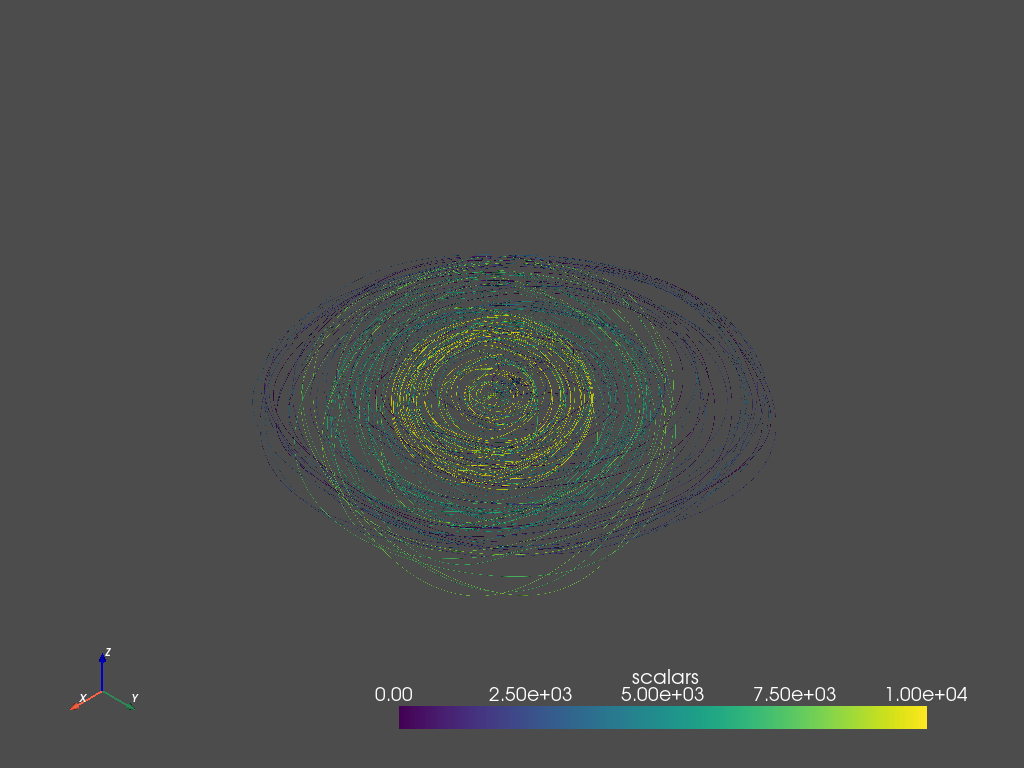

In [299]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

points = [0]

X1 = [0,0,0]
X2 = [1000*Sun_distance[n],0,0]

charge = e_orb[2]*e_orb[9]*(1.6E-19)**2
distance = np.sqrt((X2[0]-X1[0])**2+(X2[1]-X1[1])**2+(X2[2]-X1[2])**2)
F = np.log(8.9875517923E9*charge/distance**2)

angle = np.arctan((X2[1]-X1[1])/(X2[0]-X1[0]))
if X2[0] == X1[0]:
  angle = 0

a = 0
if X2[0]<X1[0]:
  a = 1

# Sun
n=9

# Magnetic electrons

A = np.log(n_freeMG[n])
f = np.log(n_freeMG[n])
X = X1
n_points = 100

force12 = F*np.sin(theta+angle+a*np.pi)

points = objct2(points,A,f,n_points,X[0],X[1],X[2],force12)


# Thermal electrons

A = np.log(n_freeTH[n])
f = np.log(n_freeTH[n])
n_points = 100

points = objct2(points,A,f,n_points,X[0],X[1],X[2],force12)


# Orbital electrons

A = np.log(e_orb[n])
f = np.log(e_orb[n])
n_points = 100

points = objct2(points,A,f,n_points,X[0],X[1],X[2],force12)


# Earth
n=2

# Magnetic electrons

A = np.log(n_freeMG[n])
f = np.log(n_freeMG[n])
X = X2
n_points = 100

force21 = F*np.sin(theta+angle+(1-a)*np.pi)

points = objct2(points,A,f,n_points,X[0],X[1],X[2],force21)


# Thermal electrons

A = np.log(n_freeTH[n])
f = np.log(n_freeTH[n])
n_points = 100

points = objct2(points,A,f,n_points,X[0],X[1],X[2],force21)


# Orbital electrons

A = np.log(e_orb[n])
f = np.log(e_orb[n])
n_points = 100

points = objct2(points,A,f,n_points,X[0],X[1],X[2],force21)


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 10000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);

## Particles

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


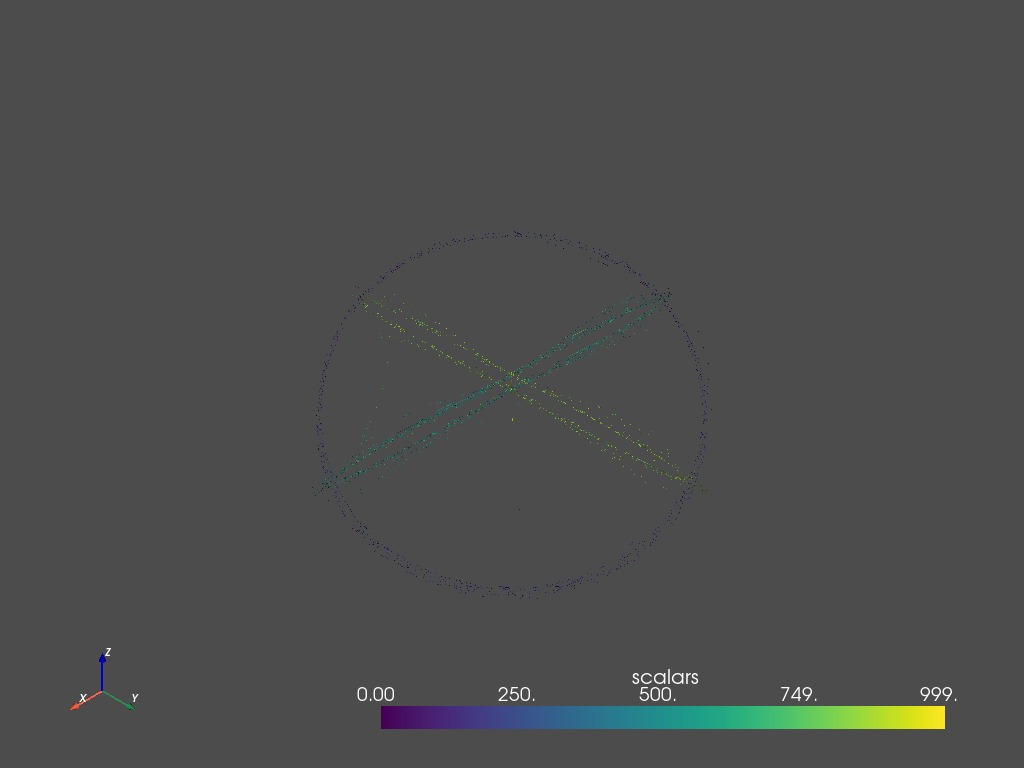

In [300]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 20
f = 40

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * np.cos(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# object 2

A = 1/20
f = 20

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (S(f*theta))+(S(f*theta))
x = r * S(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * C(theta)*A
points = np.concatenate((points,np.column_stack((x, y, z))))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = S(f*theta)+S(f*theta)
z = r * C(theta) 
x = A * r * S(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points.real, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


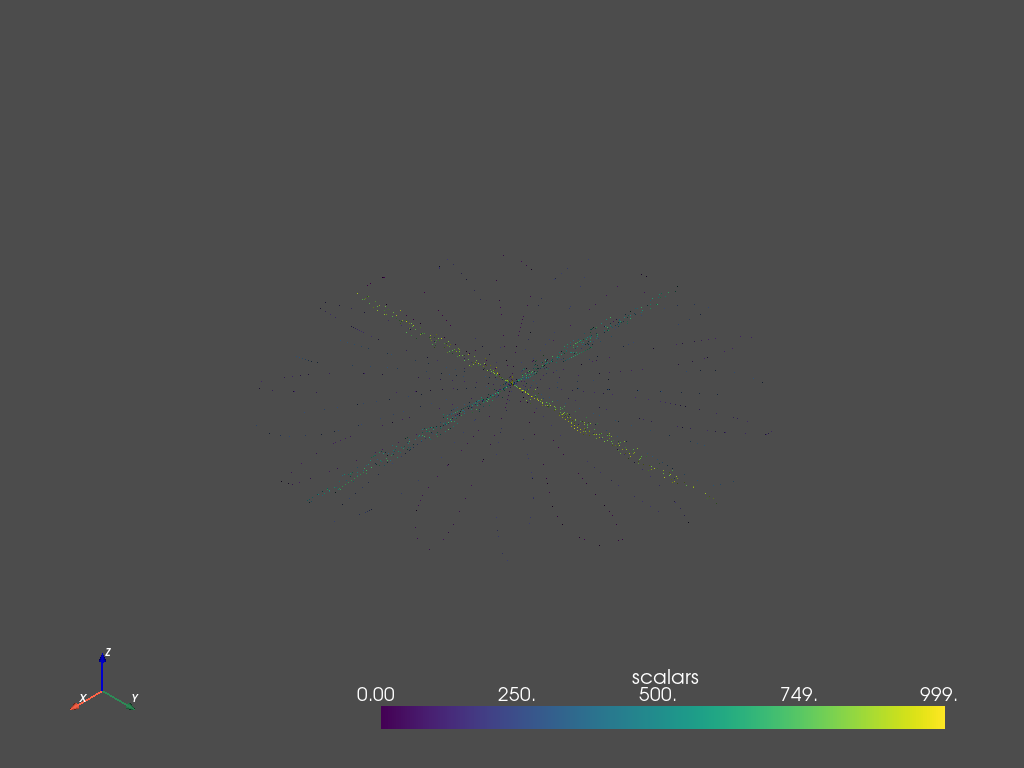

In [301]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason



# object 1

A = 20
f = 10

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# object 2

A = 1/20
f = 20

T = 1/f


# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.concatenate((points,np.column_stack((x, y, z))))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x, y, z)))


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))


# 3D plot

# Create spline with 1000 interpolation points
spline = pv.Spline(points, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


## Curved Line

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


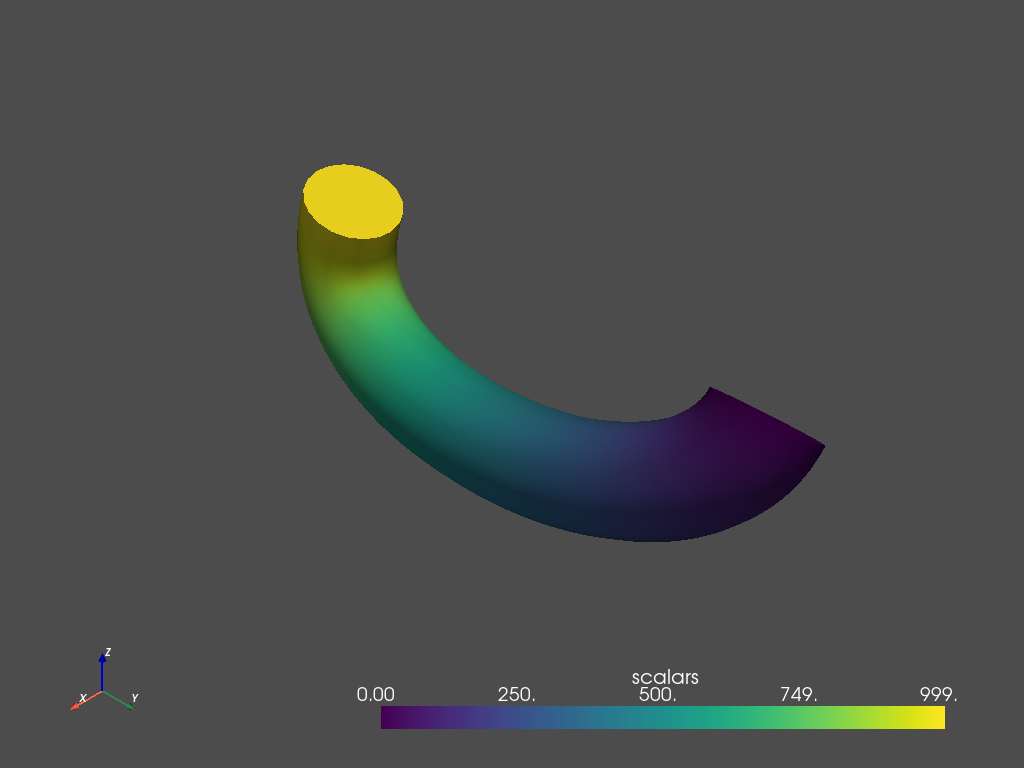

In [303]:
### new cell spline example cell ###
pn.extension('vtk')  # this needs to be at the top of each cell for some reason

A = 9
f = 99

T = 1/f

# Horizontal ring

n_points = 100
theta = np.linspace(-np.pi, np.pi, n_points)
z = np.linspace(0, 0, n_points)
r = (np.sin(f*theta))+(np.sin(f*theta))
x = r * np.sin(theta)*A-A/(2*np.pi*f)**(f-1)
y = r * np.cos(theta)*A
points = np.column_stack((x, y, z))


# Vertical ring

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))


theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,np.column_stack((x, y, z))))



import scipy

rotation_degrees = 90
rotation_radians = np.radians(rotation_degrees)
rotation_axis = np.array([0, 0, 1])

rotation_vector = rotation_radians * rotation_axis
rotation = scipy.spatial.transform.Rotation.from_rotvec(rotation_vector)
rotated_vec = rotation.apply(np.column_stack((x-A, y, z))) # changes to line


# Vertical rotated by 90
angle = np.pi/2

theta = np.linspace(-np.pi, np.pi, n_points)
r = np.sin(f*theta)+np.sin(f*theta)
z = r * np.cos(theta) 
x = A * r * np.sin(theta)
y = A * np.linspace(0, 0, n_points)
points = np.concatenate((points,rotated_vec))



# Create spline with 1000 interpolation points
spline = pv.Spline(points, 1000)

# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=5*A*0.02)
tube.plot(smooth_shading=True, notebook=True);


# Exponential mathematics

## Initialise

In [304]:
import numpy as np
import matplotlib.pyplot as plt

In [305]:
def factorial(x):
  factorial = 1
  if int(x) >= 1:
    for i in range (1,int(x)+1):
      factorial = factorial * i
  return factorial

In [306]:
def exp(x,n):
  exp = 0
  for i in range (0,n):
    exp += (1/factorial(i))
  return exp**x


In [307]:
n = 100

def E(x,n):
  return W*exp(2*f*np.pi*x,n)

def E2(x,n):
  return W*exp(2*f*np.pi*x-0.5j*np.pi,n)

def S(x):
  return W*exp(2*f*np.pi*x*1j-np.pi*0.5j,n)

def C(x):
  return W*exp(2*f*np.pi*x*1j,n)

def Electromagnetism(x):
  return S(E(x,n))

def ElectronWave(x):
  return C(C(x))

def LifeWave(x):
  return S(C(x))

## C wave and S wave comparison to cos and sine

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


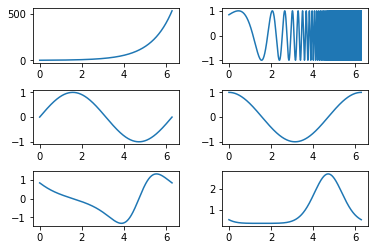

In [308]:
W = 1 # 1/1000 Volumatic # 10 lines # 25 particles # 1 normal
f = 1/(2*np.pi)
L = 10000

# w1/10, f1/10 (Default/volume)
# w1, f1 (Default/string)
# w5, f5 (Default/particles)

# w1,f100 (DNA)
# w25,f25,f100 (Particles)
# w10,f10,f99 (Particles/Lines)
# w 1/1000,f1, f25 (Volumes)


x = np.linspace(0, 2*np.pi, L)
#x = np.linspace(0, 1, L)

phase = -0/(4*f)

fig, axs = plt.subplots(3, 2)
plt.subplots_adjust(wspace=0.3, hspace=0.5)

axs[0,0].plot(x,E(x+phase,n)) # exponential
axs[1,1].plot(x,C(x+phase)) # cos
axs[1,0].plot(x,S(x+phase)) # sine

axs[0,1].plot(x,S(E(x+phase,n))) # electromagnetic spectrum

axs[2,1].plot(x,C(C(x+phase))) # electron beat
axs[2,0].plot(x,S(C(x+phase))) # heart beat

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


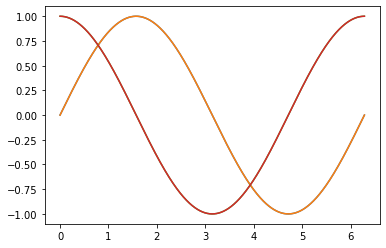

In [309]:
plt.plot(x,S(x))
plt.plot(x,np.sin(x))

plt.plot(x,C(x))
plt.plot(x,np.cos(x))



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


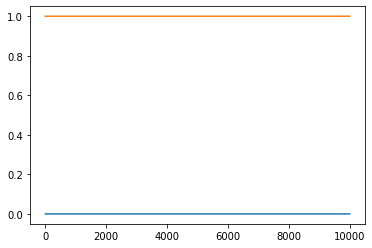

In [310]:
plt.plot(C(x)**2+S(x)**2)

plt.plot(np.cos(x)**2+np.sin(x)**2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


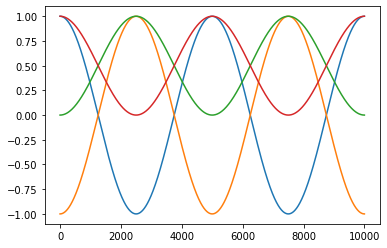

In [311]:
plt.plot(C(x)**2)
plt.plot(S(x)**2)

plt.plot(np.sin(x)**2)
plt.plot(np.cos(x)**2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


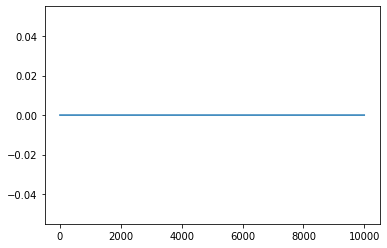

In [312]:
plt.plot(np.sin(x*1j))
#plt.plot(np.cos(x*1j))
#plt.plot(C(x*1j))
#plt.plot(S(x*1j))

## Discrete exponential increase

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


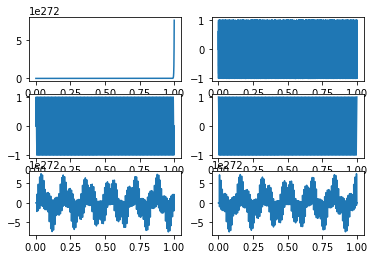

In [313]:
W = 1 # 1/1000 Volumatic # 10 lines # 25 particles # 1 normal
f = 100
L = 10000

# w1/10, f1/10 (Default/volume)
# w1, f1 (Default/string)
# w5, f5 (Default/particles)

# w1,f100 (DNA)
# w25,f25,f100 (Particles)
# w10,f10,f99 (Particles/Lines)
# w 1/1000,f1, f25 (Volumes)


x = np.linspace(0, 1, L)
#x = np.linspace(np.pi/2, 5*np.pi/2, L)

phase = -0/(4*f)

fig, axs = plt.subplots(3, 2)

axs[0,0].plot(x,E(x+phase,n)) # exponential
axs[1,1].plot(x,C(x+phase)) # cos
axs[1,0].plot(x,S(x+phase)) # sine

axs[0,1].plot(x,S(E(x+phase,n))) # electromagnetic spectrum

axs[2,1].plot(x,C(C(x+phase))) # electron beat
axs[2,0].plot(x,S(C(x+phase))) # heart beat

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


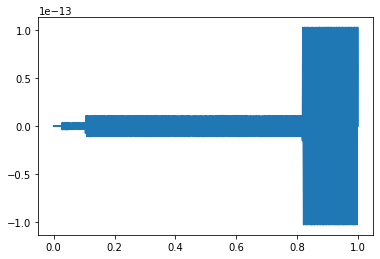

In [314]:
plt.plot(x,C(x)**2+S(x)**2)

## Comparison to ECG data

### Initiate

In [315]:
from google.colab import drive
drive.mount('/content/drive')

#%cd /content/drive/MyDrive/Machine Learning Ideas/ECG data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [316]:
# ECG data
with open("/content/drive/MyDrive/Machine Learning Ideas/Quantum Relativity/ECG data/mitbih_train.csv") as file_name:
    ecg_array = np.loadtxt(file_name, delimiter=",")

### Analysis

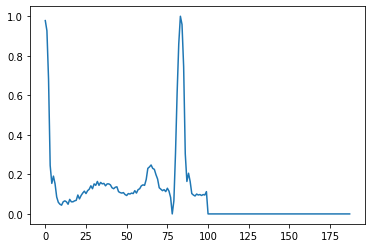

In [318]:
plt.plot(ecg_array[0,:]);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


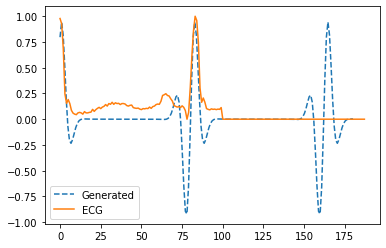

In [319]:
W = 1/2 # 1/1000 Volumatic # 10 lines # 25 particles # 1 normal
W2 = 0.0022

a = 1  #  stretch in x
c = 0  # elevation

f = 2.2
L = 188

x = np.linspace(0, 1, L)

phase = 0.35 #-0/(4*f)

plt.plot(x*180,W2*S(C(a*x+phase))+c, linestyle = '--', label = 'Generated'); # heart beat

plt.plot(ecg_array[0,:], label = 'ECG');

plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


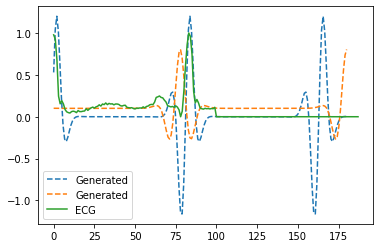

In [320]:
W = 1/2 # 1/1000 Volumatic # 10 lines # 25 particles # 1 normal
f = 2.2 

W2 = 0.0028

a1 = 1  #  stretch in x
c1 = 0  # elevation
a2 = 0.4  #  stretch in x
c2 = 0.1  # elevation


L = 188
x = np.linspace(0, 1, L)

phase1 = 0.345 #-0/(4*f)
phase2 = 0.225 #-0/(4*f)

plt.plot(x*180,W2*S(C(a1*x+phase1))+c1, linestyle = '--', label = 'Generated'); # heart beat

W = 1/4
f = 2.2*2
plt.plot(x*180,W2*C(C(a2*x+phase2))+c2, linestyle = '--', label = 'Generated'); # electronic beat

plt.plot(ecg_array[0,:], label = 'ECG');

plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


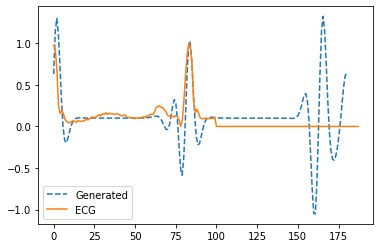

In [321]:
L = 188
x = np.linspace(0, 1, L)

W = 1/2 # 1/1000 Volumatic # 10 lines # 25 particles # 1 normal
f = 2.2 

W2 = 0.0028
a1 = 1  #  stretch in x
c1 = 0  # elevation
phase1 = 0.345

beat1 = W2*S(C(a1*x+phase1))+c1

W = 1/4
f = 2.2*2

W3 = 0.0022
a2 = 0.4  #  stretch in x
c2 = 0.1  # elevation
phase2 = 0.225

beat2 = W3*C(C(a2*x+phase2))+c2


plt.plot(x*180,beat1+beat2, linestyle = '--', label = 'Generated'); # electronic beat
plt.plot(ecg_array[0,:], label = 'ECG');
plt.legend()

### Machine learning

#### Initialise

In [322]:
# Machine learning to update parameters efficiently

def beat_gen_analysis(W1,W2,a,c,f1,phase,ecg):


  n = 100

  def E(x,n):
    return W*exp(2*f*np.pi*x,n)

  def E2(x,n):
    return W*exp(2*f*np.pi*x-0.5j*np.pi,n)

  def S(x):
    return W*exp(2*f*np.pi*x*1j-np.pi*0.5j,n)

  def C(x):
    return W*exp(2*f*np.pi*x*1j,n)

  def Electromagnetism(x):
    return S(E(x))

  def ElectronWave(x):
    return C(C(x))

  def LifeWave(x):
    return S(C(x))

  W = W1
  f = f1
  
  L = 188
  x = np.linspace(0, 1, L)

  #plt.plot(x*180,W2*S(C(a*x+phase))+c, linestyle = '--', label = 'Generated'); # heart beat
  #plt.plot(ecg, label = 'ECG');
  plt.legend()


  return W2*S(C(a*x+phase))+c

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


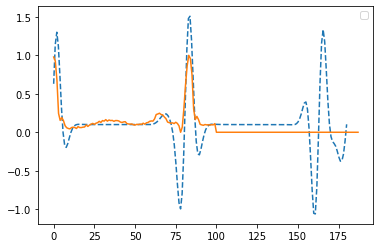

In [323]:
# Beat1

beat1 = beat_gen_analysis(0.5,0.0028,1,0,2.2,0.345,ecg_array[0,:])
                       # (W, W2,  a,c,  f,phase,ecg)


# Beat2

beat2 = beat_gen_analysis(0.25,0.0022,0.4,0.1,4.4,0.225,ecg_array[0,:])
                        # (W, W2,  a,c,  f,phase,ecg)

plt.plot(x*180,beat1+beat2, linestyle = '--', label = 'Generated');
plt.plot(ecg_array[0,:], label = 'ECG');

In [324]:
def heartbeat(W1, W2,  a1,c1,  f1,phase1, W12, W22,  a2,c2,  f2,phase2,ecg):
  # Beat1

  beat1 = beat_gen_analysis(W1, W2,  a1,c1,  f1,phase1,ecg)
                        # (W, W2,  a,c,  f,phase,ecg)


  # Beat2

  beat2 = beat_gen_analysis(W12, W22,  a2,c2,  f2,phase2,ecg)
                          # (W, W2,  a,c,  f,phase,ecg)

  plt.plot(x*180,beat1+beat2, linestyle = '--', label = 'Generated');
  plt.plot(ecg_array[0,:], label = 'ECG');

  return beat1+beat2

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


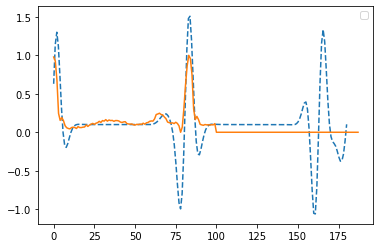

In [325]:
W1, W2,  a1,c1,  f1,phase1 = 0.5,0.0028,1,0,2.2,0.345
W12, W22,  a2,c2,  f2,phase2,ecg = 0.25,0.0022,0.4,0.1,4.4,0.225,ecg_array[0,:]

hbeat = heartbeat(W1, W2,  a1,c1,  f1,phase1, W12, W22,  a2,c2,  f2,phase2,ecg)
               # (W1, W2,  a1,c1,  f1,phase1, W12, W22,  a2,c2,  f2,phase2,ecg)

#### Variable training

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


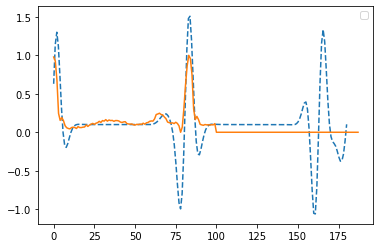

In [326]:
# Beat1

W = 1/2 
f = 2.2 

beat1 = beat_gen_analysis(0.5,0.0028,1,0,2.2,0.345,ecg_array[0,:])
                       # (W, W2,  a,c,  f,phase,ecg)


# Beat2

W = 0.25
f = 4.4 

beat2 = beat_gen_analysis(0.25,0.0022,0.4,0.1,4.4,0.225,ecg_array[0,:])
                        # (W, W2,  a,c,  f,phase,ecg)

plt.plot(x*180,beat1+beat2, linestyle = '--', label = 'Generated');
plt.plot(ecg_array[0,:], label = 'ECG');

## Comparison to Electromagnetic spectrum

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


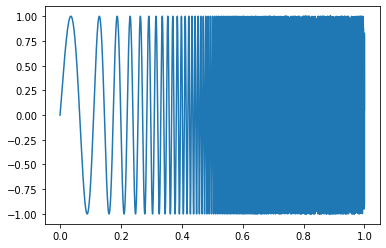

In [327]:
W = 1 # 1/1000 Volumatic # 10 lines # 25 particles # 1 normal
f = 1
L = 10000

# w1/10, f1/10 (Default/volume)
# w1, f1 (Default/string)
# w5, f5 (Default/particles)

# w1,f100 (DNA)
# w25,f25,f100 (Particles)
# w10,f10,f99 (Particles/Lines)
# w 1/1000,f1, f25 (Volumes)


x = np.linspace(0, 1, L)
#x = np.linspace(np.pi/2, 5*np.pi/2, L)

phase = -0/(4*f)

plt.plot(x,S(E(x+phase,n))) # electromagnetic spectrum


# Exponential wave mathematics

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


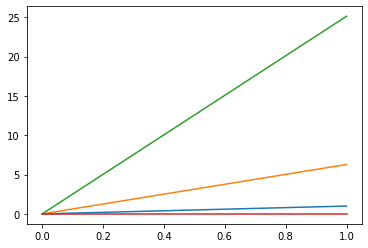

In [328]:
W = 1
f = 4
x = np.linspace(0,1,100)

plt.plot(x,(x))
plt.plot(x,(2*np.pi*x))
plt.plot(x,(2*np.pi*f*x))
plt.plot(x,(2*np.pi*f*x*1J))
#plt.plot(x,np.exp(2*np.pi*f*x))

In [329]:
x = 1
y = 1

sum = np.zeros(10000)

for K in range(1,10000):
    y *= x/K
    sum[K] = y

2*np.sum(sum)

3.4365636569180906

## Exponential function

### Opposite

In [330]:
def exp2(x):
  x = np.array(x)
  accuracy = 100

  y = np.ones(len(x))
  if isinstance(x[0], complex):
    y = np.ones(len(x))*1j
    
  y2 = np.zeros((accuracy,len(x)))

  for K in range(1,accuracy):
      y*= x/K
      for i in range(0,len(x)):
        y2[K,i] = np.sum(y[i],axis=0)

  return y2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


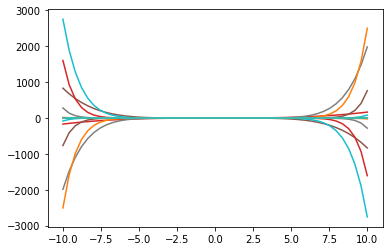

In [331]:
x = np.linspace(-10,10,50)
plt.plot(x,np.transpose(exp2(1j*x)));

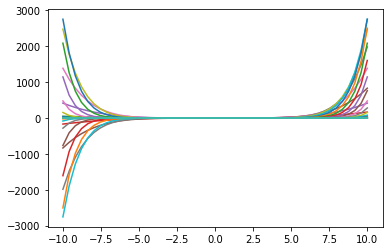

In [332]:
plt.plot(x,np.transpose(exp2(x)));

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


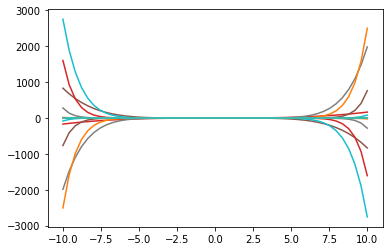

In [333]:
plt.plot(x,np.transpose(exp2(1j*x)));

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


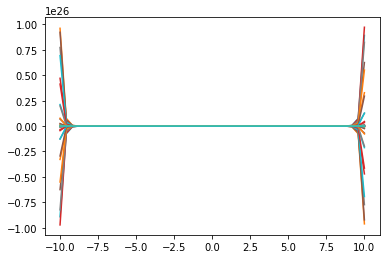

In [334]:
f = 1

plt.plot(x,np.transpose(exp2(2*np.pi*f*x*1j)));

### Normal

In [335]:
accuracy = 1000

x = np.array([1])

y = np.ones(len(x))
y2 = np.zeros((accuracy,len(x)))

for K in range(1,accuracy):
    y *= x/K
    for i in range(0,len(x)):
      y2[K,i] = y[i]

np.sum(y2,axis=0)+1

array([2.71828183])

In [336]:
def exp(x):
  x = np.array(x)
  accuracy = 1000

  y = np.ones(len(x))
  if isinstance(x[0], complex):
    y = np.ones(len(x))*1j
    
  y2 = np.zeros((accuracy,len(x)))

  for K in range(1,accuracy):
      y *= x/K
      for i in range(0,len(x)):
        y2[K,i] = y[i]

  return np.sum(y2,axis=0)

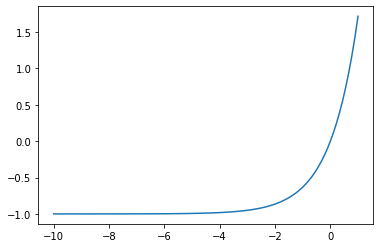

In [337]:
x = np.linspace(-10,1,100)
plt.plot(x,exp(x))

In [338]:
exp([1j*np.pi])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


array([-1.7646957e-141])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


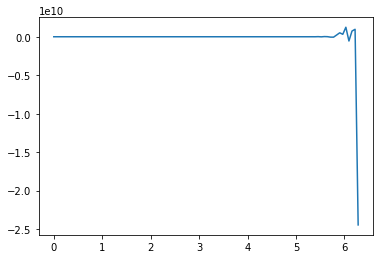

In [339]:
x = np.linspace(0,2*np.pi,100)

f = 10/(2*np.pi)
W = 1

y = W*exp(-2*np.pi*f*x*1j)

plt.plot(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


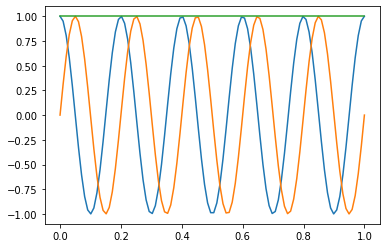

In [340]:
# sine and cos

x = np.linspace(0,1,100)

f = 5
W = 1

y = W*exp(-2*np.pi*f*x*1j-0.5*1j*np.pi)

plt.plot(x,y)

y = W*exp(-2*np.pi*f*x*1j)

plt.plot(x,y)

plt.plot((W*exp(-2*np.pi*f*x*1j)**2+W*exp(-2*np.pi*f*x*1j-0.5*1j*np.pi)**2)[0:round(max(x))+1]);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


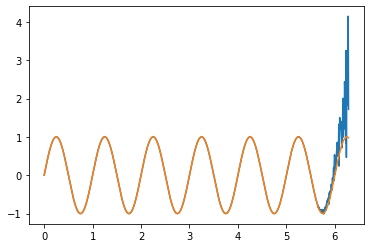

In [341]:
x = np.linspace(0,2*np.pi,1000)

f = 2*np.pi/(2*np.pi)
W = 1

y = np.transpose(W*exp(-2*np.pi*f*x*1J)-exp([np.pi*1j]))

plt.plot(x,y)

plt.plot(x,np.sin(2*np.pi*x))

### Orbital becoming thermal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


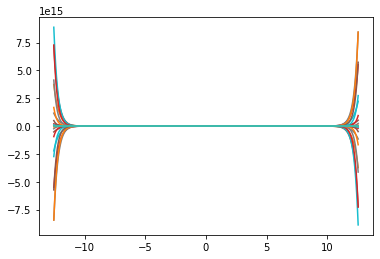

In [342]:
x = np.linspace(-4*np.pi,4*np.pi,1000)

f = 1*np.pi/(2*np.pi)  # 0.1, 2 or 10*np.pi/(2*np.pi)
W = 1

y = np.transpose(W*exp2(-2*np.pi*f*x*1J)-exp2([np.pi*1j]))

plt.plot(x,y);

#plt.polar(x,np.sin(f*2*np.pi*x))

#### Coil of wire

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


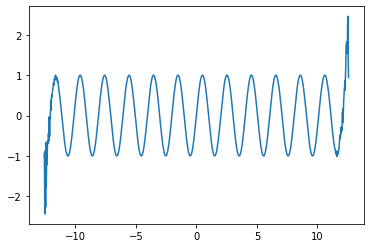

In [343]:
x = np.linspace(-4*np.pi,4*np.pi,1000)

f = 0.99*np.pi/(2*np.pi)  # 0.1, 2 or 10*np.pi/(2*np.pi)
W = 1

y = np.transpose(W*exp(-2*np.pi*f*x*1J)-exp([np.pi*1j]))

plt.plot(x,y);

#plt.polar(x,np.sin(f*2*np.pi*x))

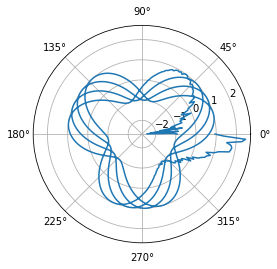

In [344]:
plt.polar(x,y);

## Waves

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


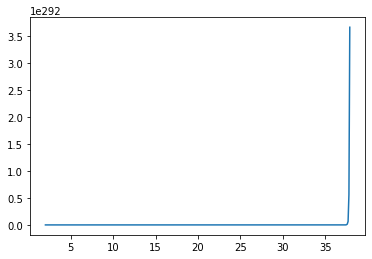

In [345]:
# W = 2
# f = 2
# x = np.linspace(0,2,10000)+1

# y = W*exp(2*np.pi*f*x*1J-0.5J*np.pi)

# plt.plot(x,y)


W = 3
f = 3
x = np.linspace(0,1000,10000)+2

y = W*exp(2*np.pi*f*x*1J-0.5J*np.pi)

plt.plot(x,y)


# W = 4
# f = 4
# x = np.linspace(0,1,1000)+3

# y = W*exp(2*np.pi*f*x*1J-0.5J*np.pi)

#plt.plot(x,y)

In [346]:
def primewave(n):

  W = n
  f = n
  x = np.linspace(0,1,1000)+n-1

  y = W*np.exp(2*np.pi*f*x*1J-0.5J*np.pi)

  plt.plot(x,y);

  return y

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

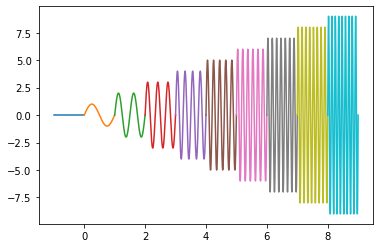

In [347]:
for i in range(0,10):
  y = primewave(i)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

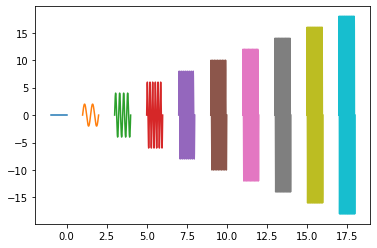

In [348]:
for i in range(0,20,2):
  y = primewave(i)

## Fibonacci sequence makes it look 3D

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

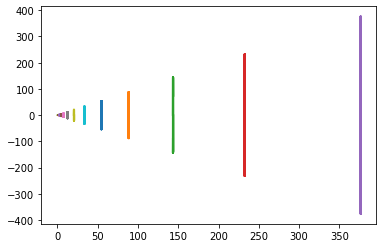

In [349]:
for i in [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]:
  y = primewave(i)

## Primes

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

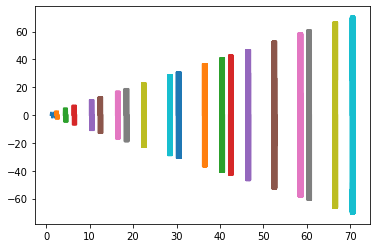

In [350]:
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]

for i in primes[0:20]:
  y = primewave(i)

In [351]:
def primewave(n):

  W = n
  f = n
  x = np.linspace(0,1,1000)+n-1

  y = W*np.exp(2*np.pi*f*x*1J-0.5J*np.pi)

  plt.plot(x+0.5,y);
  plt.plot(-y,x+0.5);

  plt.plot(x+0.5,y);
  plt.plot(-y,x+0.5);

  return y

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

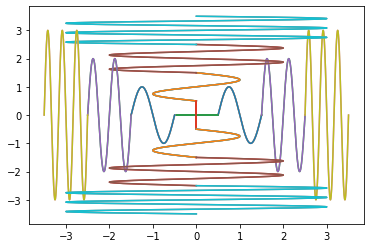

In [352]:
fib = 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377

for i in fib[0:5]:
  y = primewave(i)

for i in fib[0:5]:
  y = primewave(-i)